In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Complete Dataset/preprocessedWithGPS.csv')

df.head(5)

player_names  daily_load  fatigue  mood  \
0  TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93       720.0      3.0   4.0   
1  TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93       800.0      3.0   3.0   
2  TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93       900.0      2.0   4.0   
3  TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93       200.0      3.0   3.0   
4  TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93       720.0      3.0   3.0   

   readiness  sleep_duration  sleep_quality  soreness  stress  injury_ts  ...  \
0        7.0             8.0            3.0       3.0     3.0        0.0  ...   
1        6.0             8.0            3.0       3.0     3.0        0.0  ...   
2        6.0             7.0            3.0       3.0     4.0        0.0  ...   
3        6.0             7.0            3.0       3.0     3.0        0.0  ...   
4        6.0             7.0            2.0       3.0     3.0        0.0  ...   

       acwr     atl  ctl28  ctl42  monotony  strain team_performance  \
0  3.999682  125.71  31.43  20.95      0.41   360.8         4.280000   
1  4.000259  154.29  38.57  25.71      0.41   442.8         6.660000   
2  4.000523  152.86  38.21  25.48      0.41   438.7         7.360000   
3  3.999752  161.43  40.36  26.90      0.41   463.3         6.275556   
4  4.000187  214.29  53.57  35.71      0.41   615.0         6.490000   

   offensive_performance  defensive_performance  illness  
0                   4.26                   4.70        0  
1                   6.13                   7.13        0  
2                   6.75                   7.07        0  
3                   5.85                   5.90        0  
4                   4.14                   5.99        0  

[5 rows x 28 columns]

In [ ]:
# Get the count of rows and columns
num_rows, num_columns = df.shape

# Print the count of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Print all column names
print("Column Names:")
print(df.columns)

# Check if any row contains NaN value in every column
nan_rows = df[df.isna().all(axis=1)]

if len(nan_rows) > 0:
    print("\nRows with NaN values in every column:")
    print(nan_rows)
else:
    print("\nNo rows with NaN values in every column.")

Number of rows: 8595
Number of columns: 28
Column Names:
Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')

No rows with NaN values in every column.


In [ ]:
df.rename(columns={}, inplace=True)

In [ ]:
df['injury'].value_counts()

injury
0    8539
1      56
Name: count, dtype: int64

## Visualization

### Correlation

In [ ]:
# Compute the correlation matrix
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       daily_load   fatigue      mood  readiness  \
daily_load               1.000000 -0.064853 -0.076466   0.146757   
fatigue                 -0.064853  1.000000  0.346740   0.465817   
mood                    -0.076466  0.346740  1.000000   0.174827   
readiness                0.146757  0.465817  0.174827   1.000000   
sleep_duration          -0.061317  0.259281  0.183632   0.125531   
sleep_quality           -0.098287  0.421005  0.409527   0.171394   
soreness                -0.151924  0.444711  0.296504   0.252511   
stress                  -0.096434  0.342201  0.595816   0.175076   
injury_ts                0.018304 -0.027215 -0.018232  -0.089758   
weekly_load              0.549299 -0.219093 -0.147328   0.058677   
Total_distance           0.254112 -0.005602  0.083421  -0.065227   
Average_running_speed    0.349781  0.085010  0.138436   0.136105   
Top_speed                0.161429  0.113557  0.081096   0.131446   
HIR                      0.3

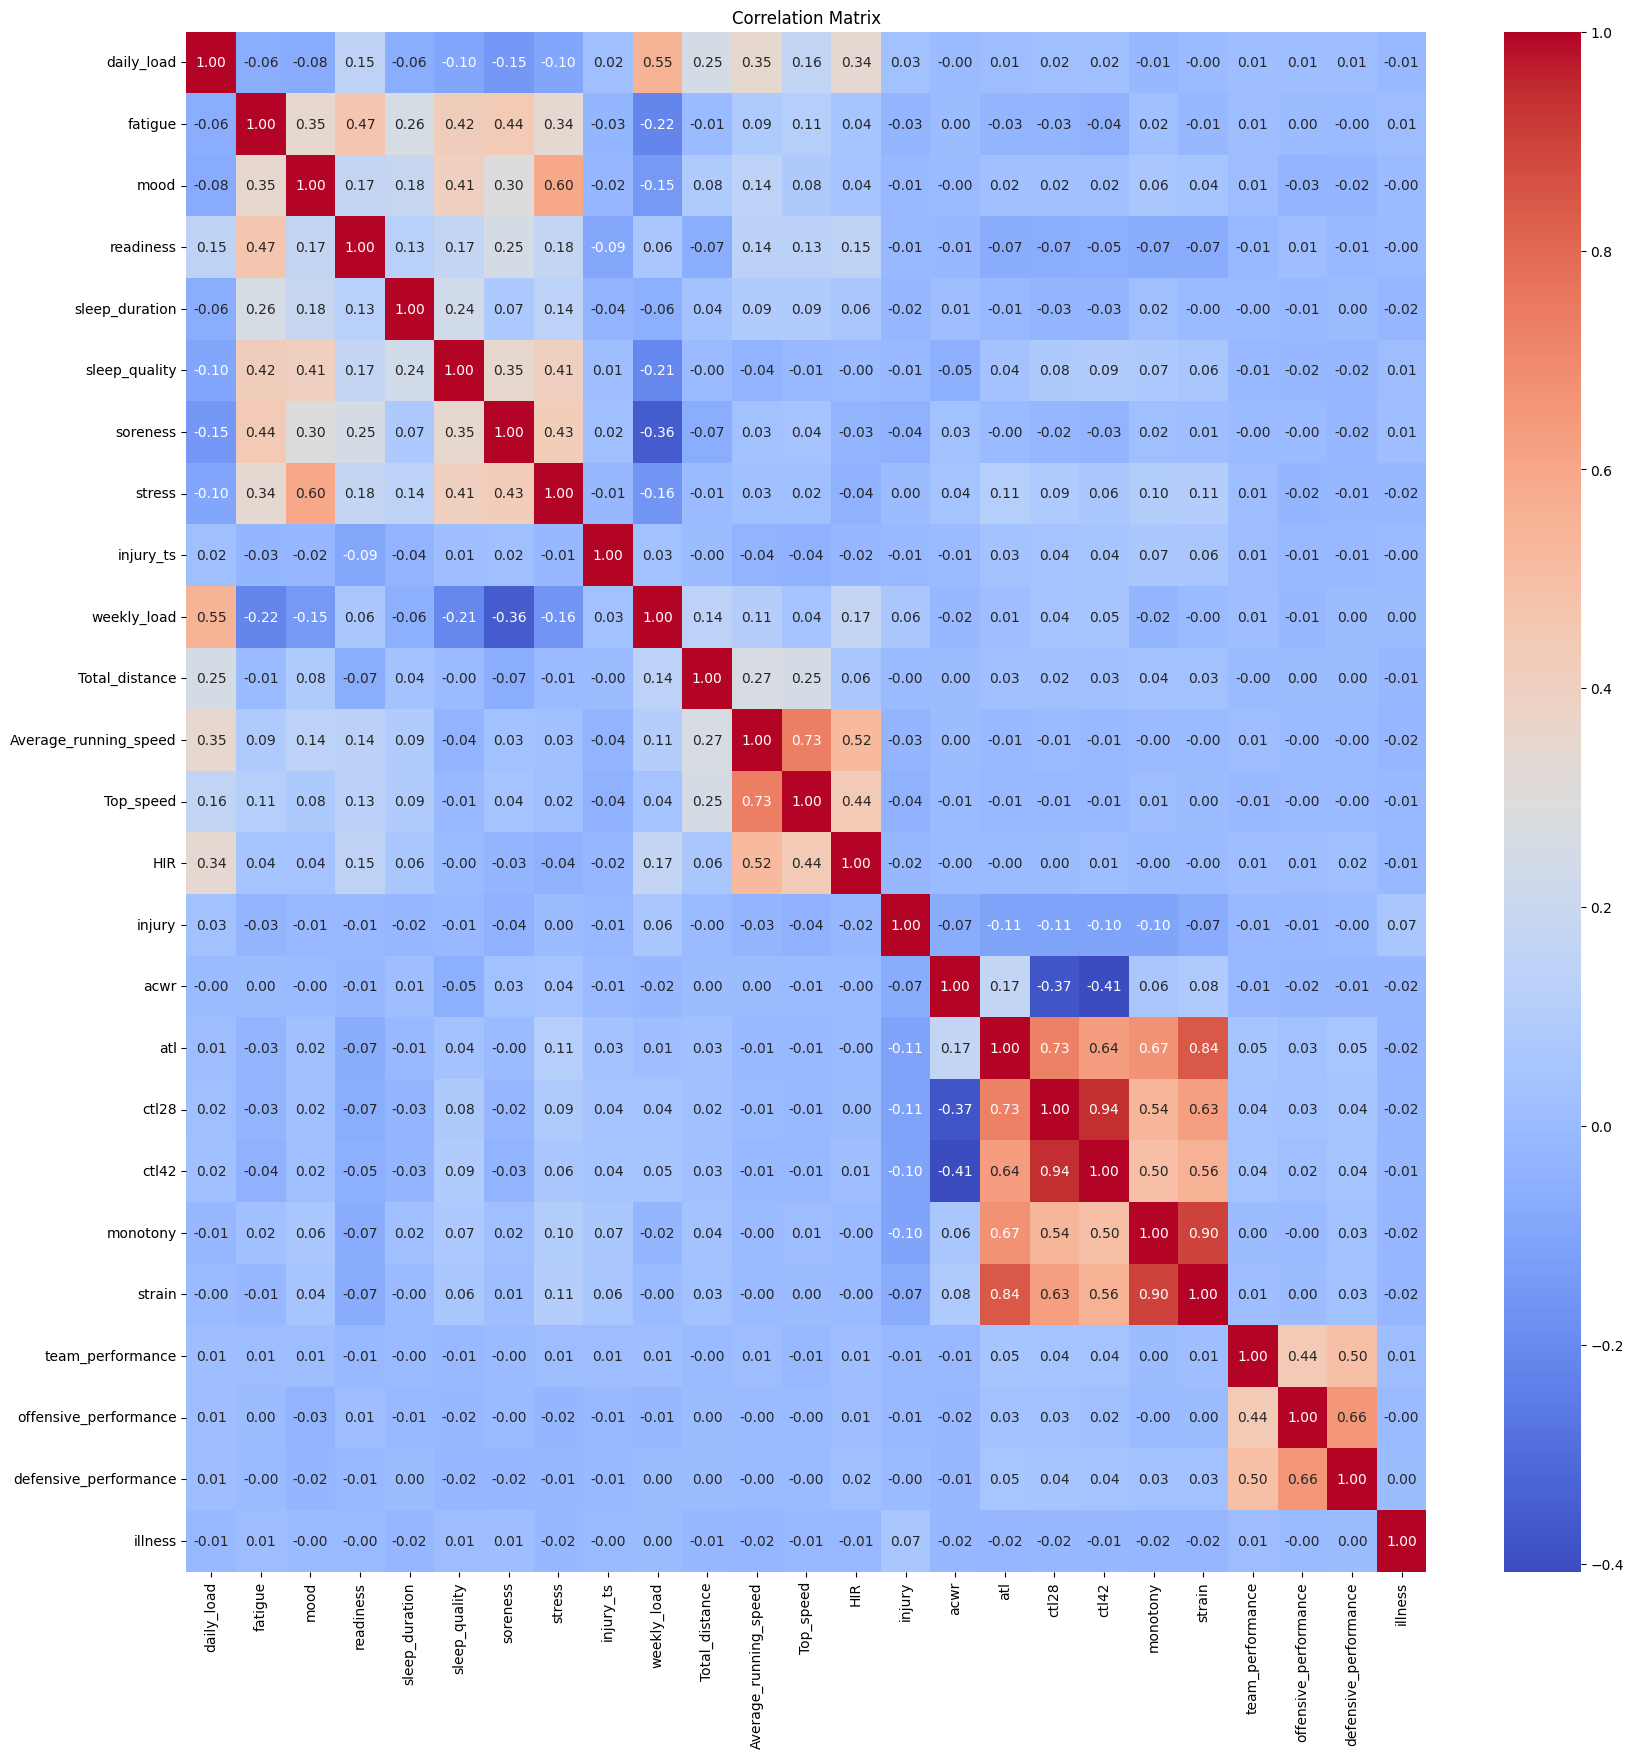

In [ ]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df_numeric.columns)


Index(['daily_load', 'fatigue', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'stress', 'injury_ts', 'weekly_load',
       'Total_distance', 'Average_running_speed', 'Top_speed', 'HIR', 'injury',
       'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness'],
      dtype='object')


In [ ]:
# Printing correlation values
correlation_matrix_injury = df_numeric.corr()[['injury']].sort_values(by='injury', ascending=False)
for i, col in enumerate(correlation_matrix_injury.index):
    print(f"Correlation with 'injury' for column '{col}': {correlation_matrix_injury.iloc[i, 0]}")

Correlation with 'injury' for column 'injury': 1.0
Correlation with 'injury' for column 'illness': 0.0653022231214548
Correlation with 'injury' for column 'weekly_load': 0.059130381350337886
Correlation with 'injury' for column 'daily_load': 0.030989472768184617
Correlation with 'injury' for column 'stress': 0.0018091533439470006
Correlation with 'injury' for column 'defensive_performance': -0.002155662542121816
Correlation with 'injury' for column 'Total_distance': -0.0036313839688024052
Correlation with 'injury' for column 'readiness': -0.006051522502767899
Correlation with 'injury' for column 'injury_ts': -0.006194688537193587
Correlation with 'injury' for column 'team_performance': -0.0073453401359810525
Correlation with 'injury' for column 'mood': -0.00758323730135274
Correlation with 'injury' for column 'sleep_quality': -0.008255754523107057
Correlation with 'injury' for column 'offensive_performance': -0.008851484355387079
Correlation with 'injury' for column 'HIR': -0.015034775

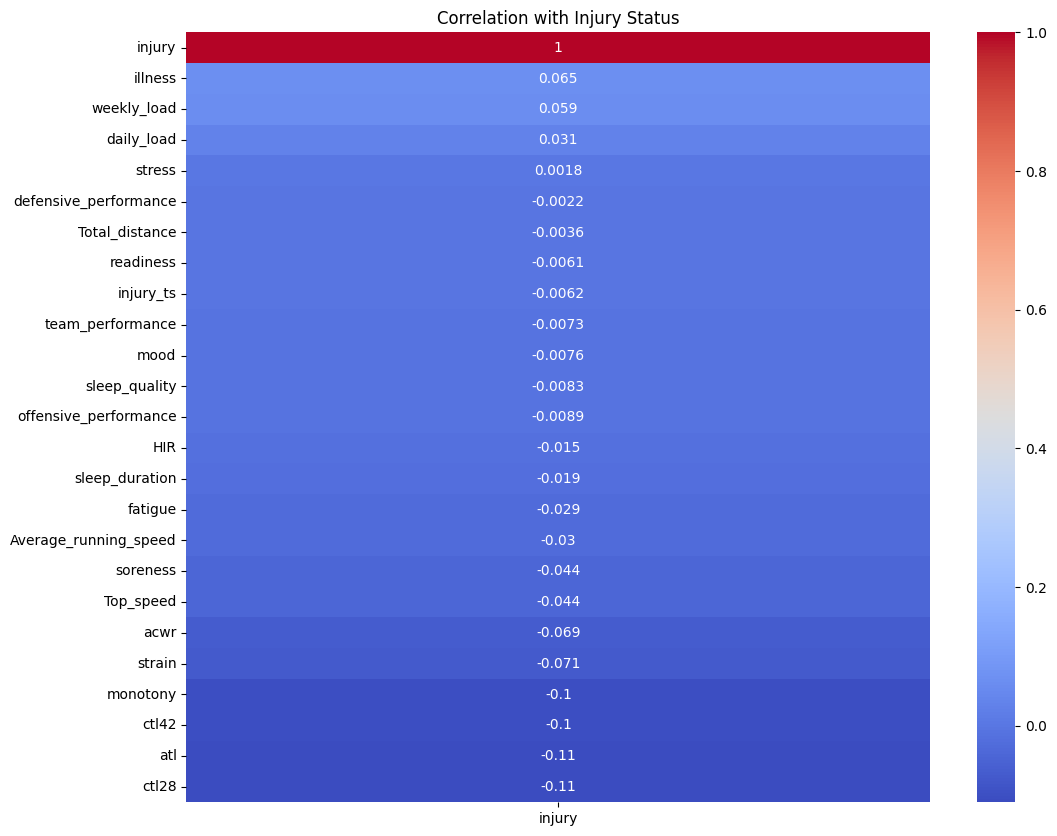

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr()[['injury']].sort_values(by='injury', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Injury Status')
plt.show()

**Summary of some observations:**

- Features such as 'monotony', 'weekly_load', 'strain', 'daily_load', 'ctl42', 'ctl28' and 'defensive_performance' have relatively high positive correlations with the 'injury' column. This suggests that higher values of these features might be associated with a higher likelihood of injury occurrence.

- Additionally, features such as 'team_performance', 'atl', 'stress', 'illness', 'Total_distance', 'readiness', 'acwr', 'injury_ts' and 'mood' also exhibit positive correlations with the 'injury' column, although slightly lower compared to the previously mentioned features. While these correlations are not as strong, they still indicate a potential association between these factors and injury risk.

- On the other hand, features such as 'sleep_quality', 'offensive_performance', 'HIR', 'sleep_duration', 'fatigue', 'Average_running_speed', 'soreness' and 'Top_speed' have weak correlations with the 'injury' column. These variables may have limited predictive power for injury occurrence based on their correlation coefficients with the target variable.


In [ ]:
import pandas as pd

# Extract the columns of interest
columns_of_interest = ['monotony', 'weekly_load', 'strain', 'daily_load', 'ctl42', 'ctl28', 'defensive_performance', 'team_performance',
                       'atl', 'stress', 'illness', 'Total_distance', 'readiness', 'acwr', 'injury_ts', 'mood',
                       'sleep_quality', 'offensive_performance', 'HIR']

# Calculate correlation for each feature pair
for feature1 in columns_of_interest:
    for feature2 in columns_of_interest:
        if feature1 != feature2:  # Exclude self-correlation
            correlation = df[feature1].corr(df[feature2])
            print(f"Correlation between '{feature1}' and '{feature2}': {correlation}")

Correlation between 'monotony' and 'weekly_load': -0.02267948926512485
Correlation between 'monotony' and 'strain': 0.8999245276993504
Correlation between 'monotony' and 'daily_load': -0.014837538220228798
Correlation between 'monotony' and 'ctl42': 0.495001119166208
Correlation between 'monotony' and 'ctl28': 0.5434001873987717
Correlation between 'monotony' and 'defensive_performance': 0.030688922842571013
Correlation between 'monotony' and 'team_performance': 0.003234423304205194
Correlation between 'monotony' and 'atl': 0.671329294984625
Correlation between 'monotony' and 'stress': 0.10001814194447362
Correlation between 'monotony' and 'illness': -0.02185749612760636
Correlation between 'monotony' and 'Total_distance': 0.03680698164463337
Correlation between 'monotony' and 'readiness': -0.06702159094215929
Correlation between 'monotony' and 'acwr': 0.05687985460289404
Correlation between 'monotony' and 'injury_ts': 0.06614233495512586
Correlation between 'monotony' and 'mood': 0.05

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot each column's correlation with other columns separately
for column in numeric_columns:
    # Create a correlation matrix for the current column
    column_correlation = df[numeric_columns].corr()[column].drop(column)

    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(column_correlation), annot=True, cmap='coolwarm', fmt=".2f",
                xticklabels=[column], yticklabels=column_correlation.index)
    plt.title(f'Correlation with {column}')
    plt.xlabel('Columns')
    plt.ylabel('Columns')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

- Monotony and Strain: There's a strong positive correlation (0.8798) between monotony and strain, indicating that as monotony increases, so does the reported strain.

- Weekly Load and Daily Load: There's a moderate positive correlation (0.5540) between weekly load and daily load, suggesting that athletes with higher weekly loads tend to have higher daily loads.

- CTL42 and CTL28: There's a very strong positive correlation (0.9299) between CTL42 and CTL28, suggesting they are closely related measures.

- Sleep Quality and Mood: There's a moderate positive correlation (0.4110) between sleep quality and mood, indicating that better sleep quality is associated with better mood.

- Offensive Performance and Defensive Performance: There's a strong positive correlation (0.6615) between offensive performance and defensive performance, suggesting that they tend to improve or decline together.

- Weekly Load and Stress: There's a moderate negative correlation (-0.1654) between weekly load and stress, suggesting that higher weekly loads might be associated with lower reported stress levels.

- HIR (High Intensity Running) and Daily Load: There's a moderate positive correlation (0.3315) between HIR and daily load, indicating that higher daily loads may involve more high-intensity running.

- Stress and Mood: Strong positive correlation (0.60), indicating that stress and mood tend to move in the same direction.

- Sleep Quality and Stress: Moderate positive correlation (0.41), suggesting that higher stress levels may be associated with poorer sleep quality.

- Readiness and Sleep Quality: Moderate positive correlation (0.18), suggesting that higher readiness might be associated with better sleep quality.

- ACWR and CTL42/CTL28: Moderate negative correlations (-0.58 and -0.55, respectively), indicating an inverse relationship between acute-to-chronic workload ratio and CTL42/CTL28.

- Injury Timestamps (Injury_ts) and HIR: Weak negative correlation (-0.03), implying a slight inverse relationship between injury timestamps and the Health Impact Ratio.

In [ ]:
print(df.columns)

Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')


### Visualization in different perspective

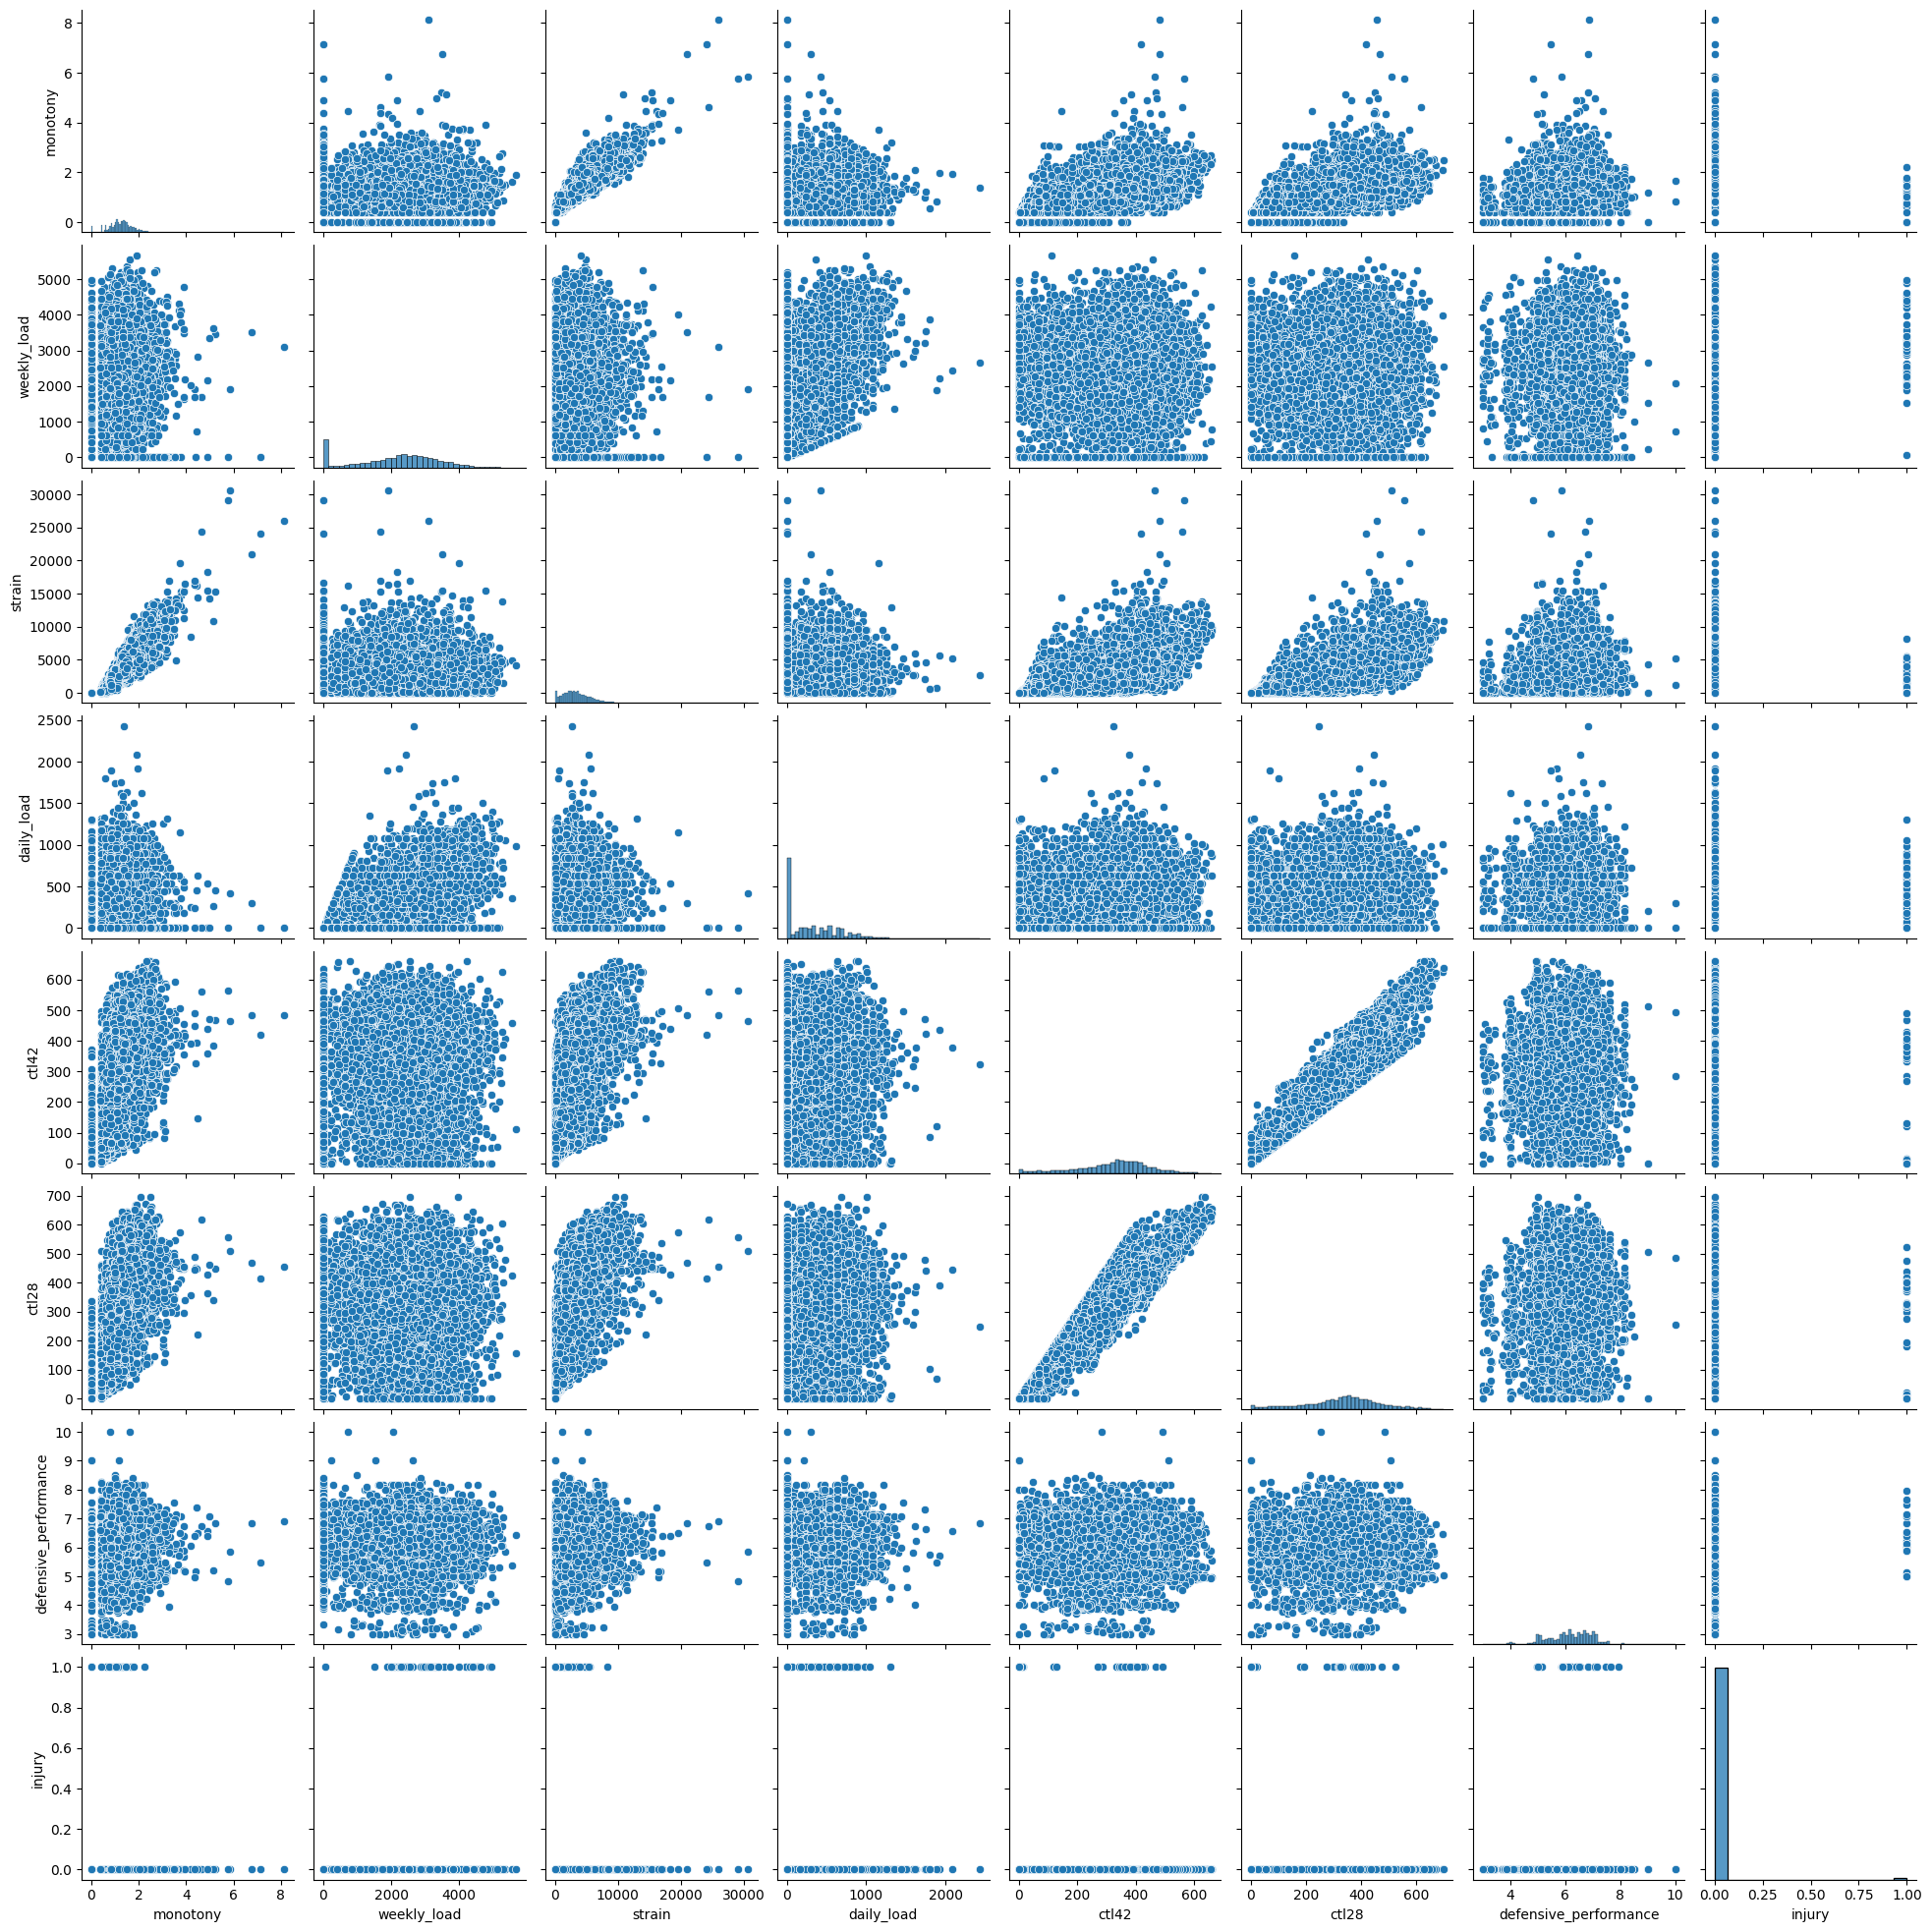

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting important columns
high_important_columns = ['monotony', 'weekly_load', 'strain', 'daily_load', 'ctl42', 'ctl28', 'defensive_performance']

# Adding 'injury' column to the selection
high_important_columns.append('injury')

# Creating pairplot
pairplot = sns.pairplot(df[high_important_columns])
plt.show()

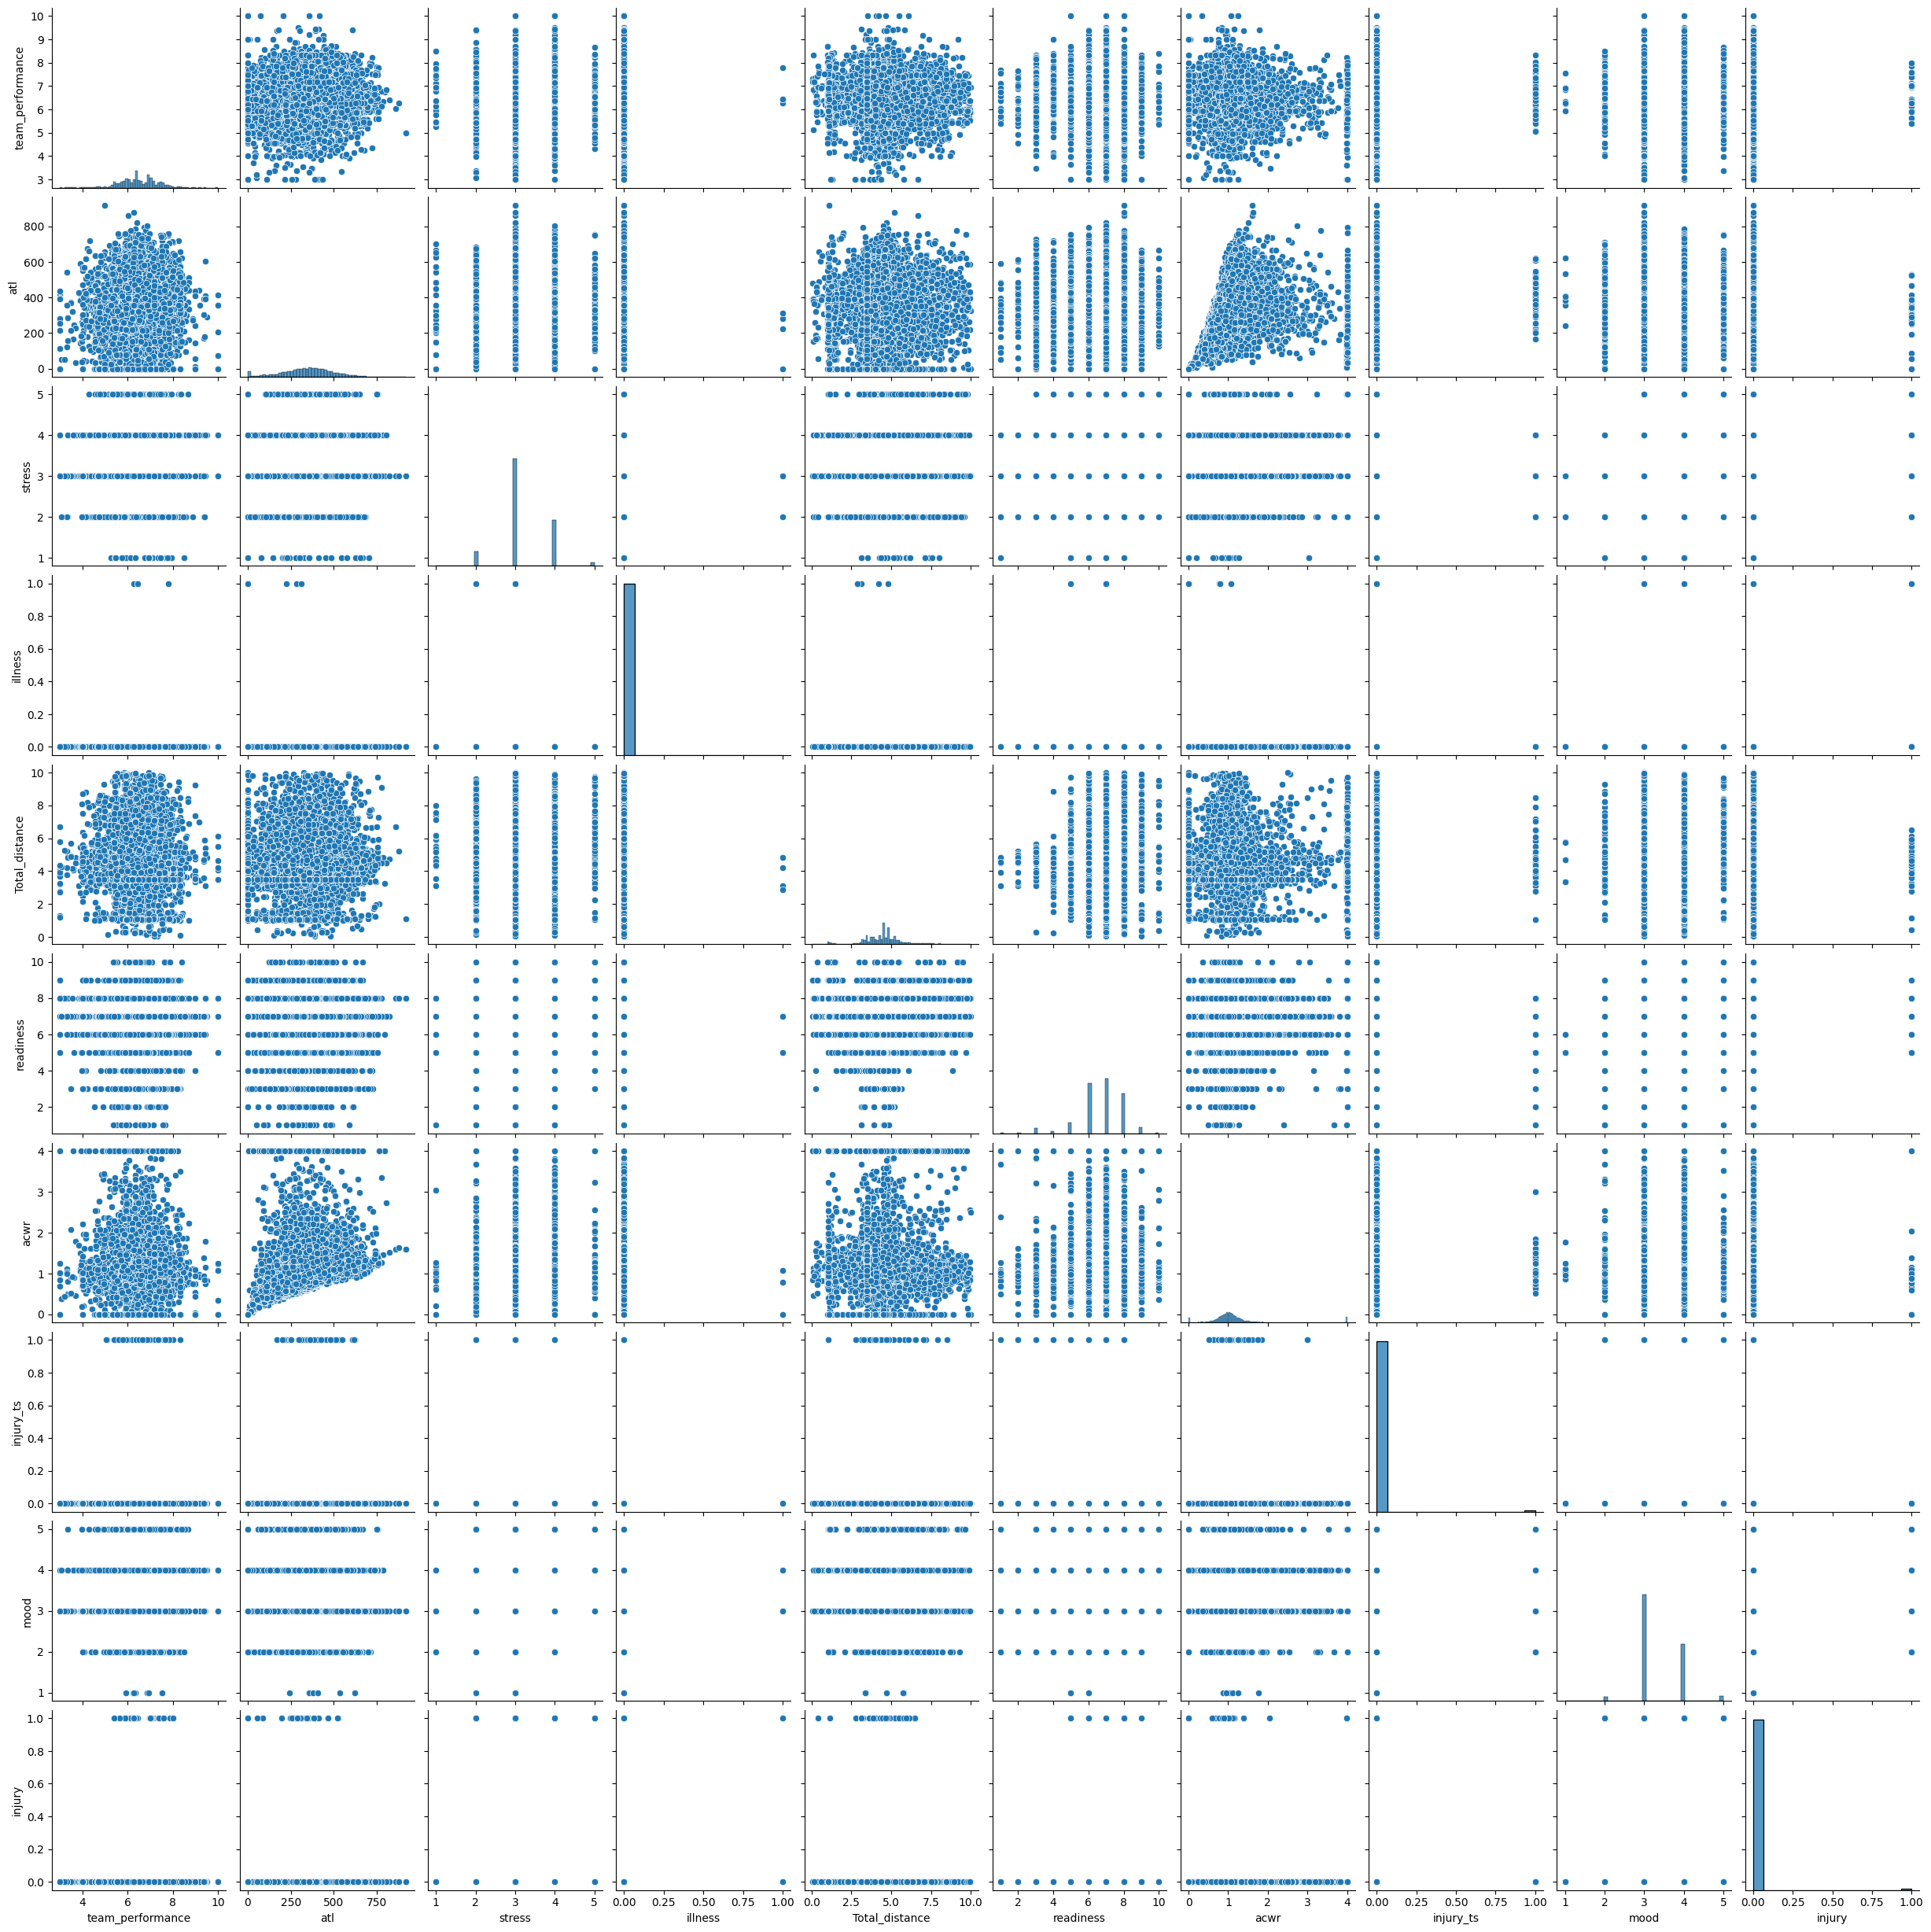

In [ ]:
slightly_important_columns = ['team_performance', 'atl', 'stress', 'illness', 'Total_distance', 'readiness', 'acwr', 'injury_ts', 'mood']

# Adding 'injury' column to the selection
slightly_important_columns.append('injury')

# Creating pairplot
pairplot = sns.pairplot(df[slightly_important_columns])
plt.show()

Based on the analysis of the plots depicting the relationships between sleep duration, soreness, injury, readiness, illness, fatigue, mood, daily load, strain, acwr, defensive performance, and offensive performance, several noteworthy observations emerge. Firstly, a negative correlation between sleep duration and soreness is evident, suggesting that individuals with longer sleep durations tend to experience lower levels of soreness. This relationship is further supported by histograms illustrating a peak in sleep duration around 7-8 hours and a clustering of soreness values around moderate levels. However, when examining the association between sleep duration and injury, as well as soreness and injury, no clear patterns or correlations are discernible. Injuries are scattered across various sleep duration and soreness levels, with most data points indicating zero injuries. Similarly, while correlations between variables such as readiness and illness, readiness and fatigue, and strain and injury are observed, scatter plots suggest that these variables do not strongly predict injury risk. Furthermore, mood levels appear to have minimal impact on injury rates, as most instances of injuries occur at lower levels of mood regardless of daily load or acwr values. Moreover, defensive and offensive performance variables were not mentioned previously; however, their relationships with other factors were not explicitly stated in the analysis provided. Overall, while some correlations exist between certain variables, the scatter plots indicate that they do not consistently predict injury risk, highlighting the complexity of factors influencing injury occurrence in athletic settings.

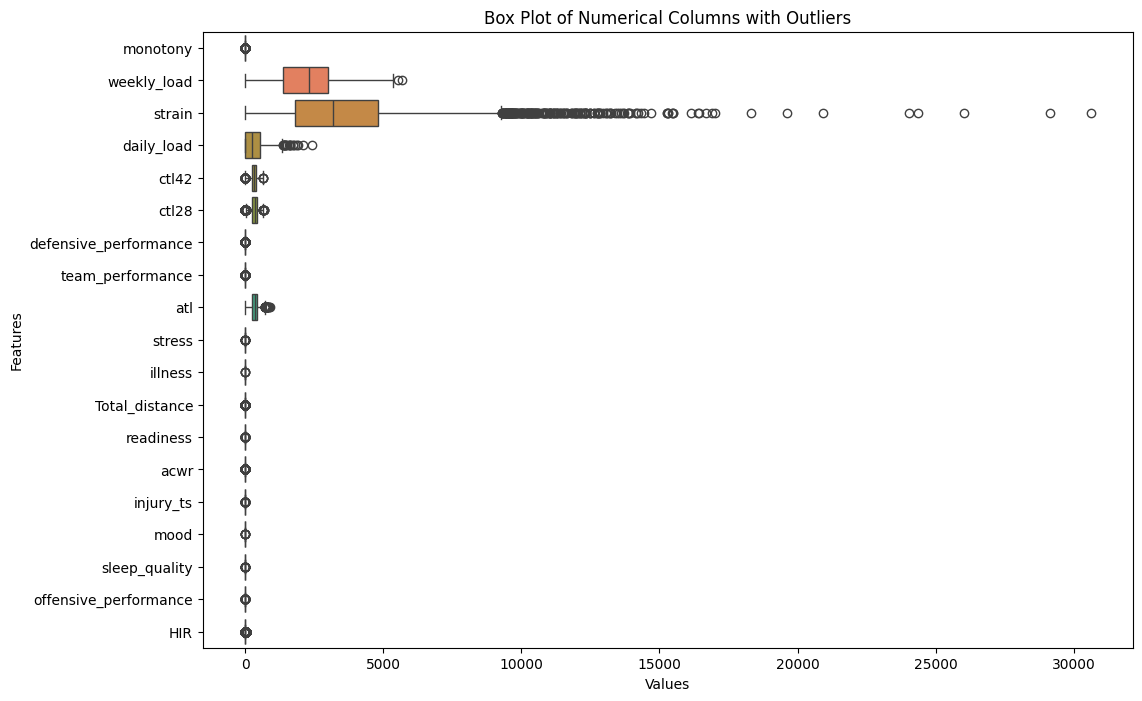

In [ ]:
# Selecting numerical columns
numerical_columns = ['monotony', 'weekly_load', 'strain', 'daily_load', 'ctl42', 'ctl28', 'defensive_performance', 'team_performance',
                       'atl', 'stress', 'illness', 'Total_distance', 'readiness', 'acwr', 'injury_ts', 'mood',
                       'sleep_quality', 'offensive_performance', 'HIR']

# Creating box plot with outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title('Box Plot of Numerical Columns with Outliers')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

The dataset reveals notable outliers across various columns, indicating potential anomalies or exceptional circumstances within the measured features. In the atl column, a few extreme data points stand out at higher values, suggesting deviations from the central distribution. Similarly, the ctl28 column exhibits several outliers at higher values, which may represent unique situations or exceptional conditions within the dataset. Additionally, the ctdl2 column displays outliers scattered across a broad range of values, possibly indicating specific events or outliers that significantly impact the overall trend captured by this feature. Furthermore, a single outlier is observed at a higher value in the daily_load column, likely due to an unusual circumstance or measurement error. Notably, both the strain and weekly_load columns reveal numerous outliers across an extensive range of high values, potentially representing critical stress levels or exceptional conditions experienced by the individuals in the dataset. These outliers underscore the importance of robust data analysis techniques to account for and interpret such extreme observations accurately.

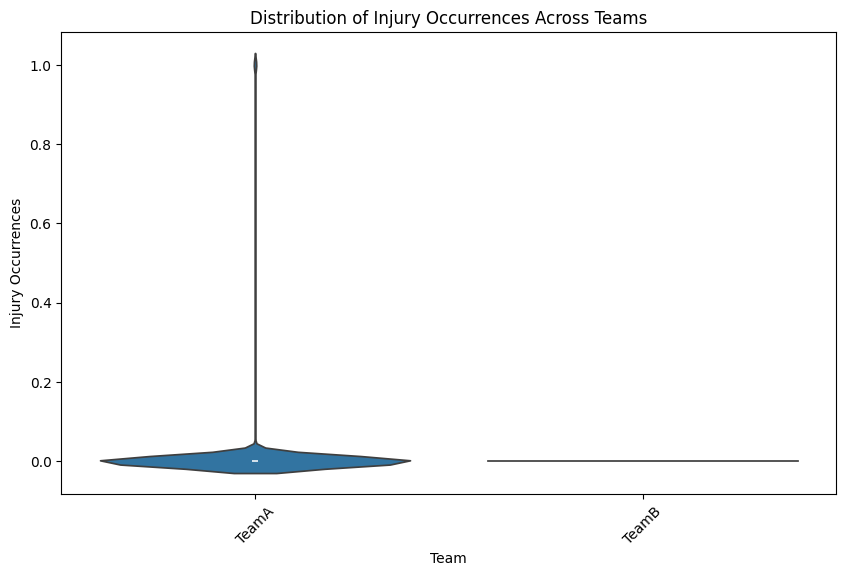

In [ ]:
# Creating violin plot for 'Team' vs 'injury'
plt.figure(figsize=(10, 6))
violin_plot = sns.violinplot(x='Team', y='injury', data=df)
plt.title('Distribution of Injury Occurrences Across Teams')
plt.xlabel('Team')
plt.ylabel('Injury Occurrences')
plt.xticks(rotation=45)
plt.show()

Both teams exhibit low injury occurrences, but Team A seems to have even fewer injuries than Team B.

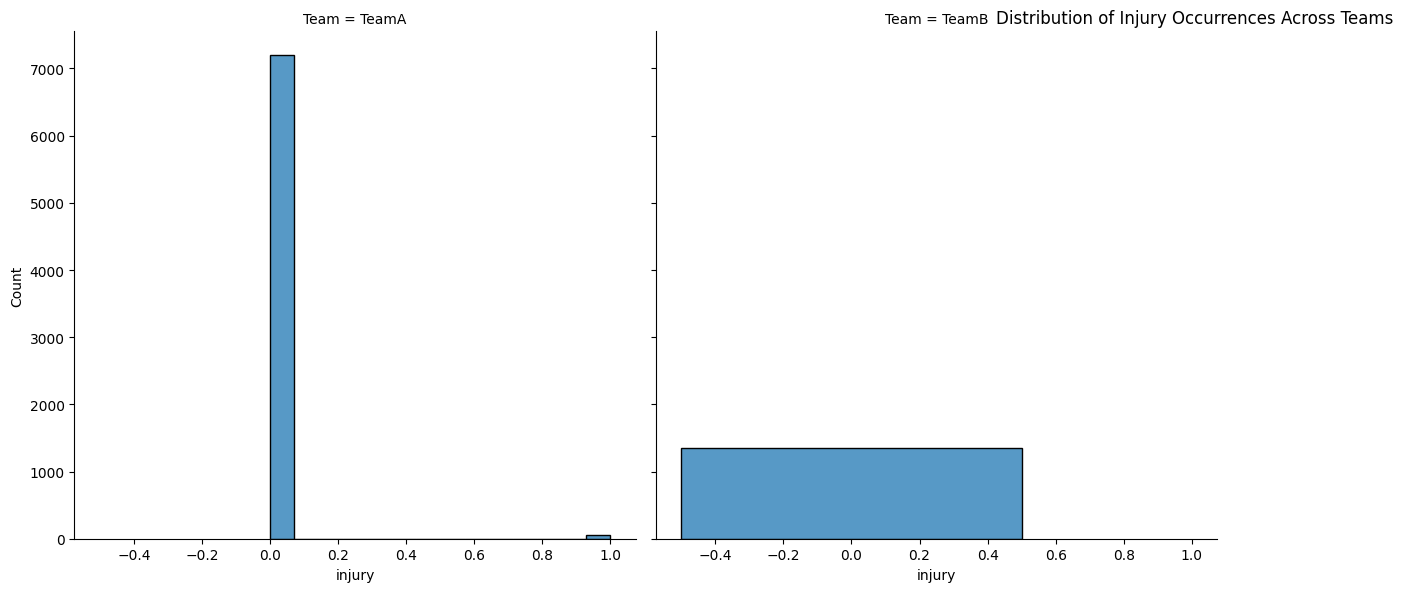

In [ ]:
# Creating facet grids for 'Team' vs 'injury'
g = sns.FacetGrid(df, col='Team', col_wrap=4, height=6)
g.map(sns.histplot, 'injury')
plt.suptitle('Distribution of Injury Occurrences Across Teams')
plt.show()

TeamB appears to have a lower rate of injuries, with most instances having no injuries. TeamA, on the other hand, has a more even distribution of injury occurrences.

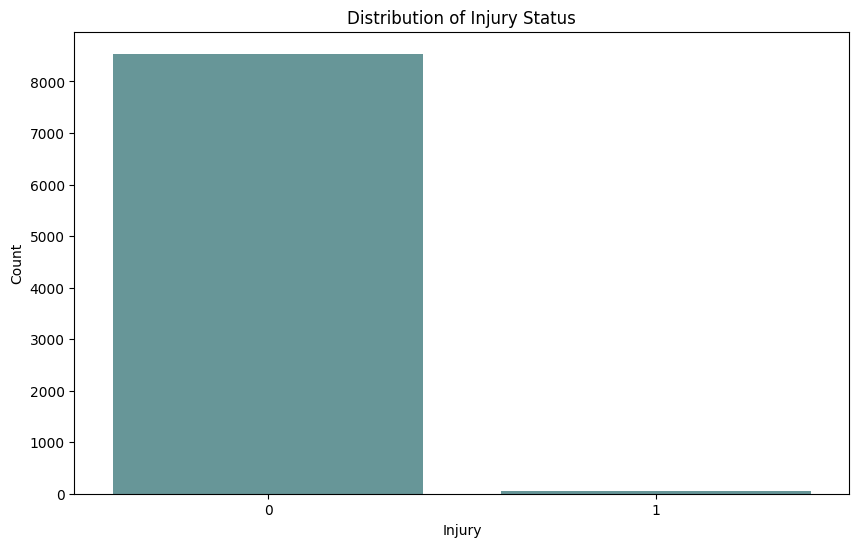

In [ ]:
# Plot distribution of injury status
plt.figure(figsize=(10, 6))
sns.countplot(x='injury', data=df, color= 'CadetBlue')  # Change color here
plt.title('Distribution of Injury Status')
plt.xlabel('Injury')
plt.ylabel('Count')
plt.show()

This plot highlights that the majority of cases have no injuries (status 0), while the occurrences of injuries (status 1) are minimal.

In [ ]:
print(df.columns)

Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')


#### Time Series Analysis

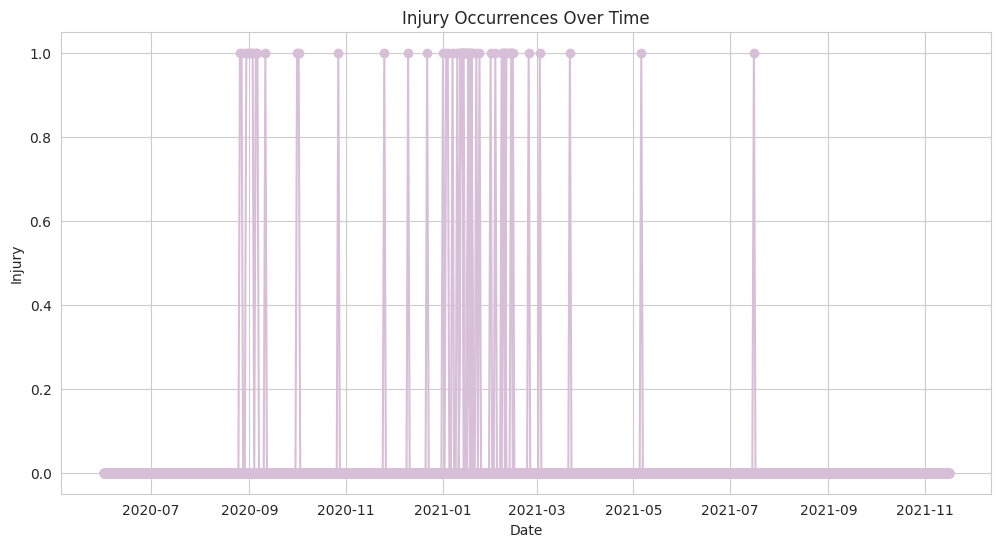

In [ ]:
import matplotlib.pyplot as plt

# Plot injury occurrences over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['injury'], marker='o', linestyle='-', color= 'Thistle')
plt.title('Injury Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Injury')
plt.grid(True)
plt.show()

In [ ]:
# # Calculate the rolling mean and standard deviation
# rolling_mean = df['injury'].rolling(window=7).mean()  # 7-day rolling mean
# rolling_std = df['injury'].rolling(window=7).std()    # 7-day rolling standard deviation

# # Plot the rolling mean and standard deviation
# plt.figure(figsize=(12, 6))
# plt.plot(df['Date'], df['injury'], marker='o', linestyle='-', label='Injury')
# plt.plot(df['Date'], rolling_mean, linestyle='--', color='red', label='Rolling Mean')
# plt.fill_between(df['Date'], rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2, label='Rolling Std')
# plt.title('Injury Occurrences with Rolling Mean and Standard Deviation')
# plt.xlabel('Date')
# plt.ylabel('Injury')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
print(df.columns)

Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')


##### Seasonal

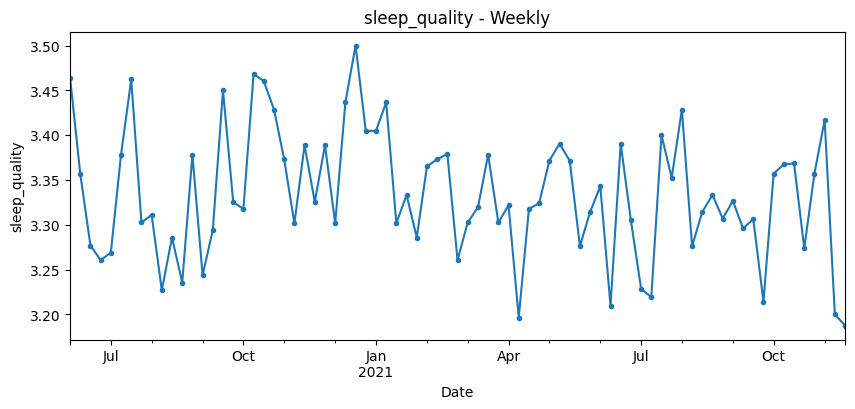

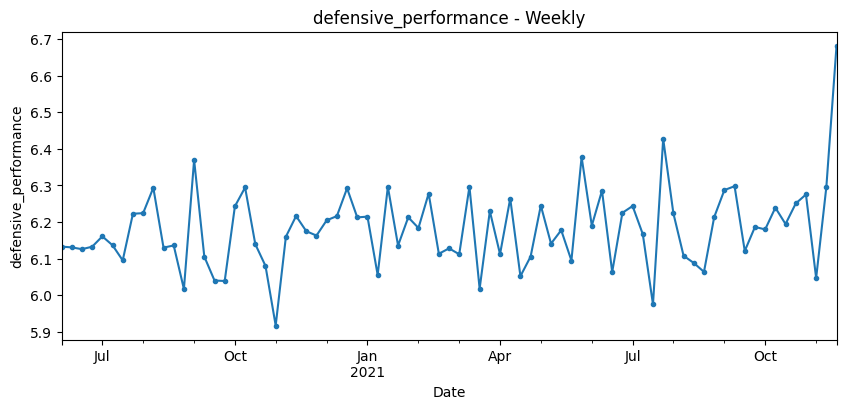

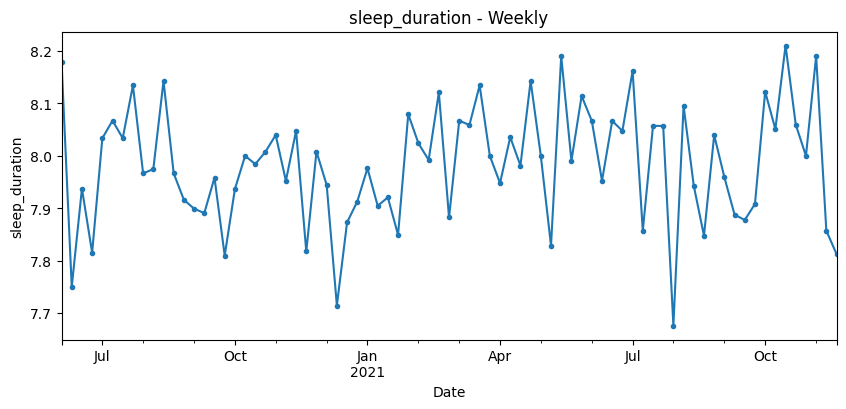

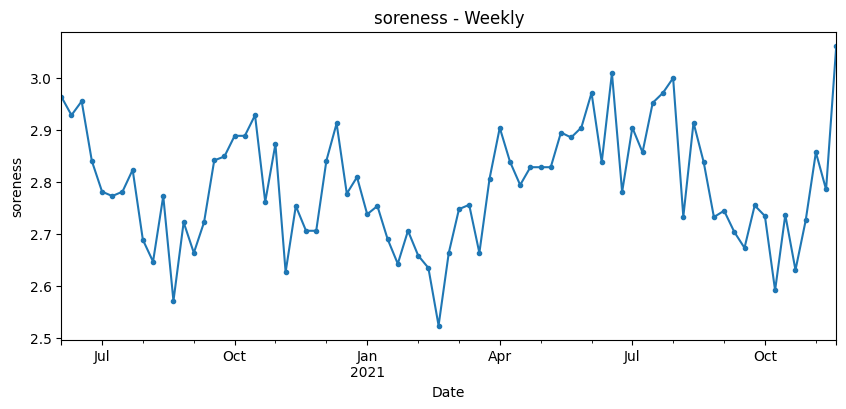

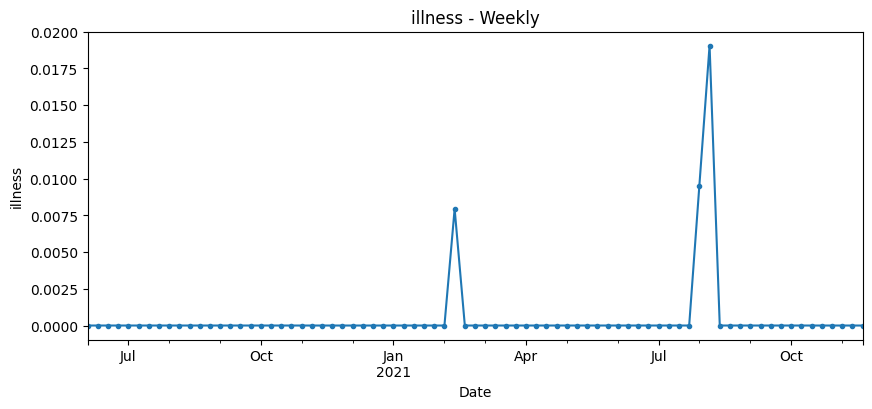

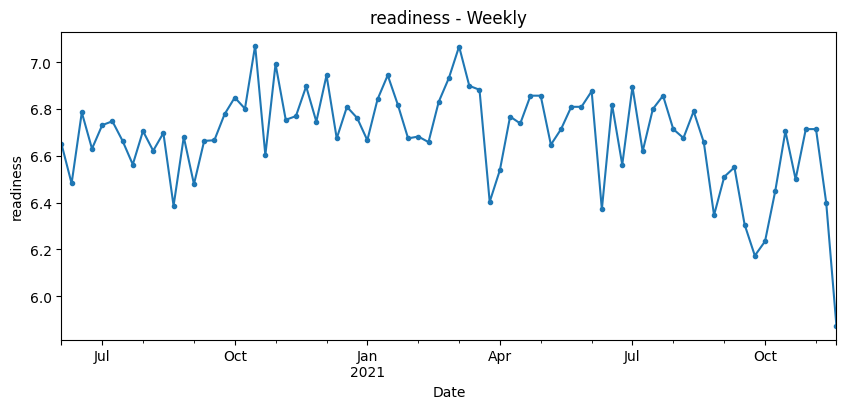

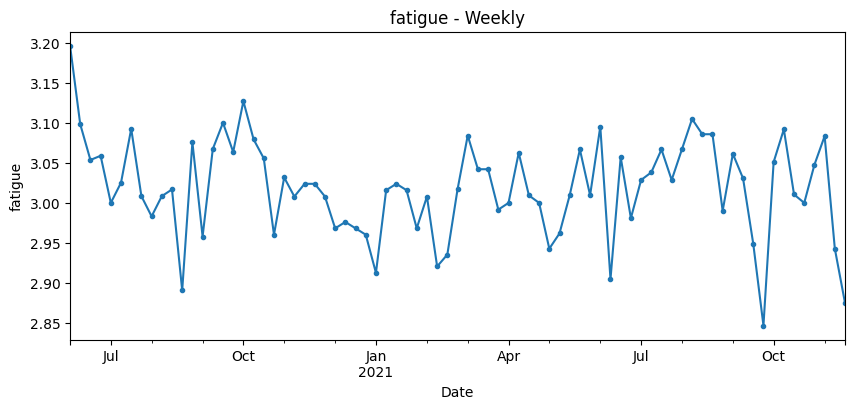

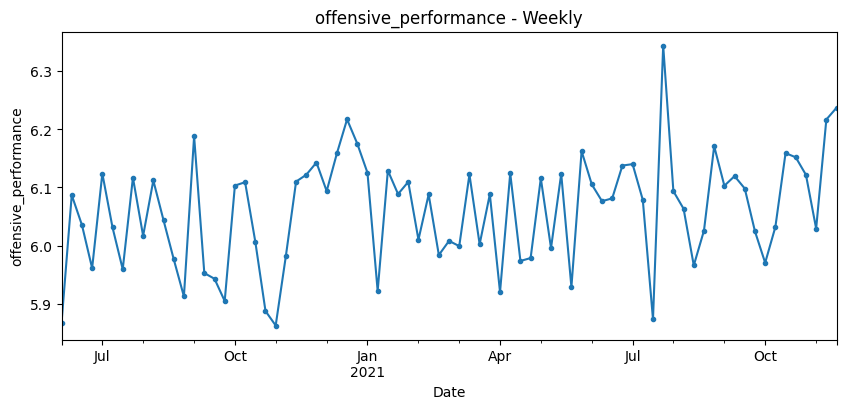

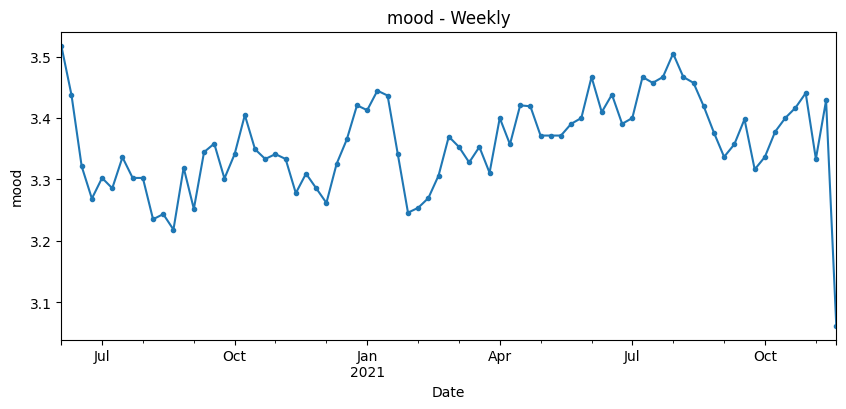

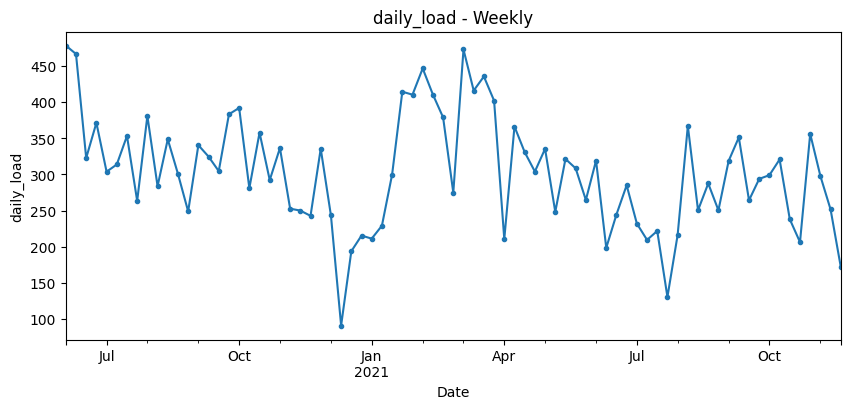

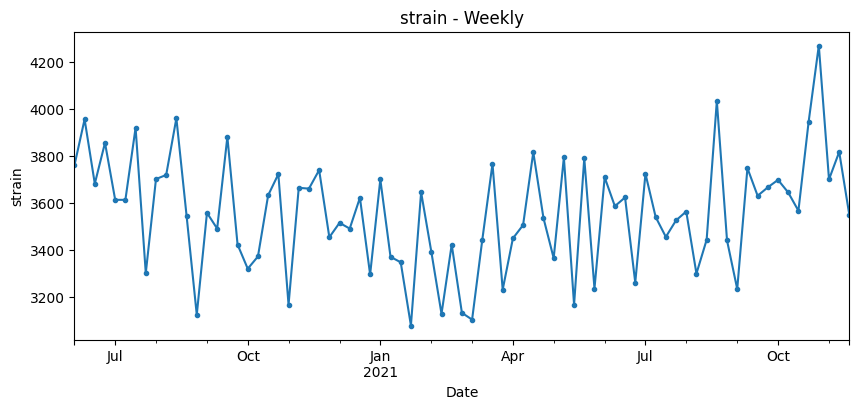

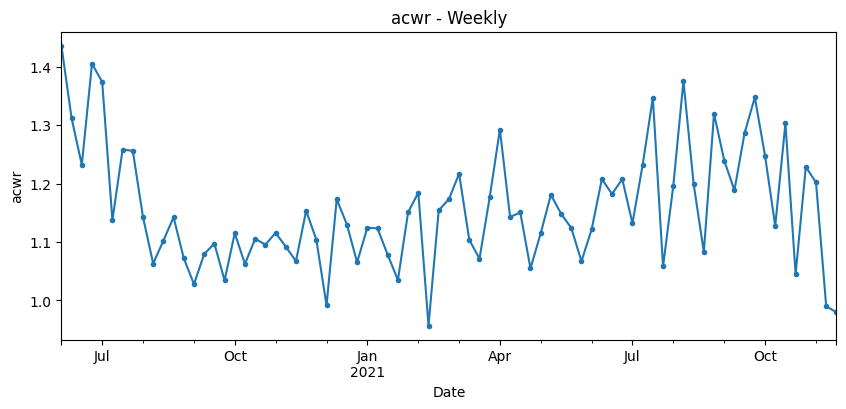

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_numeric['Date'] = df['Date'].copy()
df = df_numeric
# Convert the 'Date' column to datetime format with correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# # Convert columns to numeric (if needed)
# df = df.apply(pd.to_numeric, errors='ignore')

# Resample the data to weekly or monthly basis
data_weekly = df.resample('W').mean()  # Resample to weekly basis
data_monthly = df.resample('M').mean()  # Resample to monthly basis

important_columns = ['sleep_quality', 'defensive_performance', 'sleep_duration', 'soreness', 'illness', 'readiness', 'fatigue', 'offensive_performance', 'mood', 'daily_load', 'strain', 'acwr']

# Plot the time series for important columns on a weekly basis
for var in important_columns:
    ax = data_weekly[var].plot(linestyle="-", marker=".", figsize=[10, 4])  # Plot the time series
    plt.title(f"{var} - Weekly")  # Add title
    plt.ylabel(var)  # Y axis label
    plt.show()


In [ ]:
print(df.columns)

Index(['daily_load', 'fatigue', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'stress', 'injury_ts', 'weekly_load',
       'Total_distance', 'Average_running_speed', 'Top_speed', 'HIR', 'injury',
       'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness'],
      dtype='object')


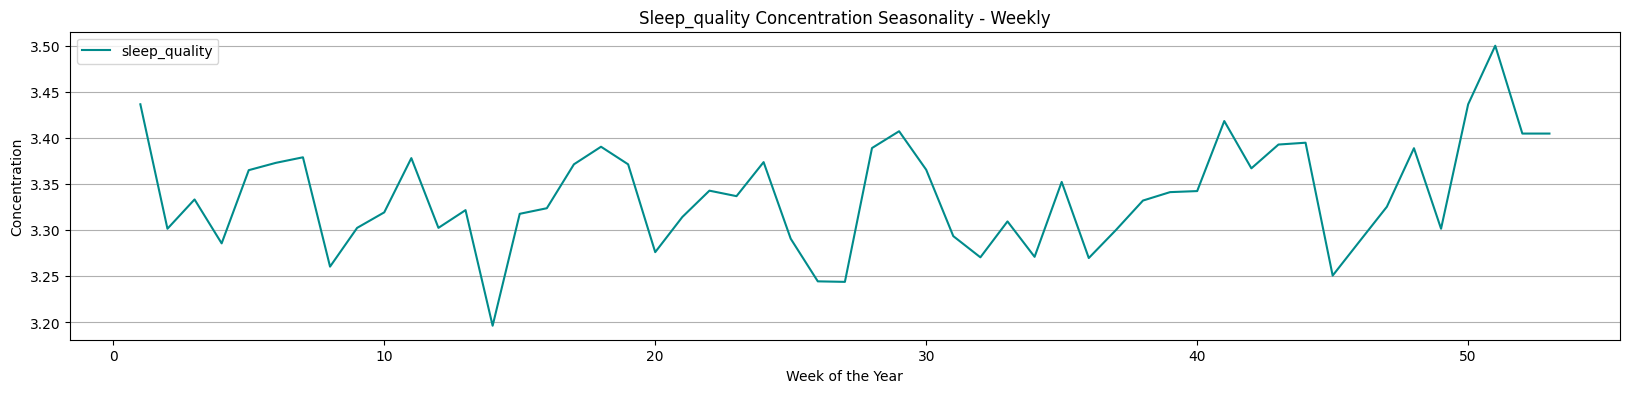

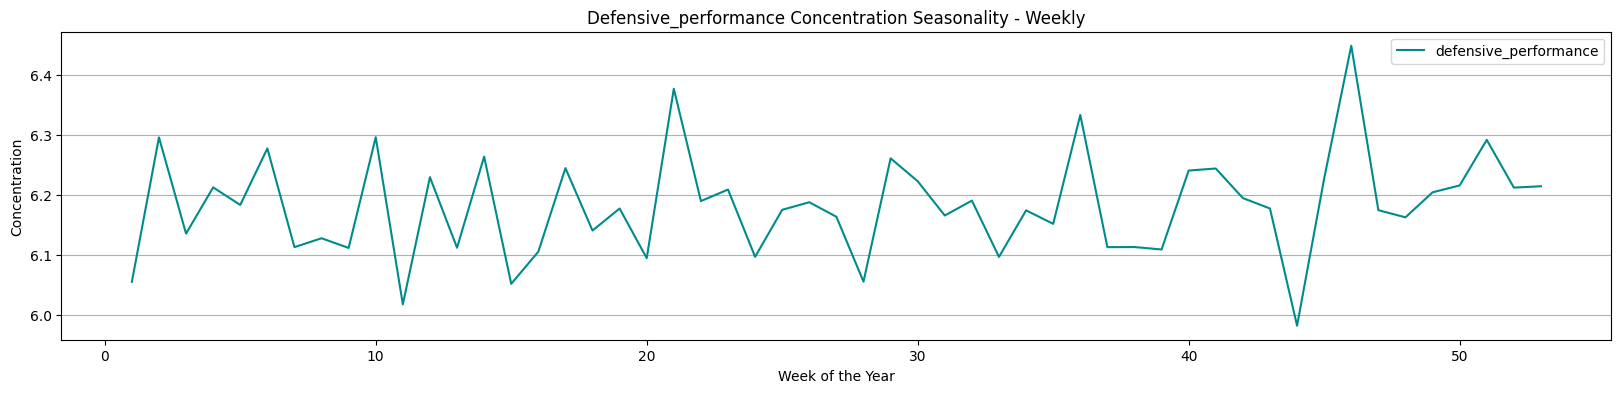

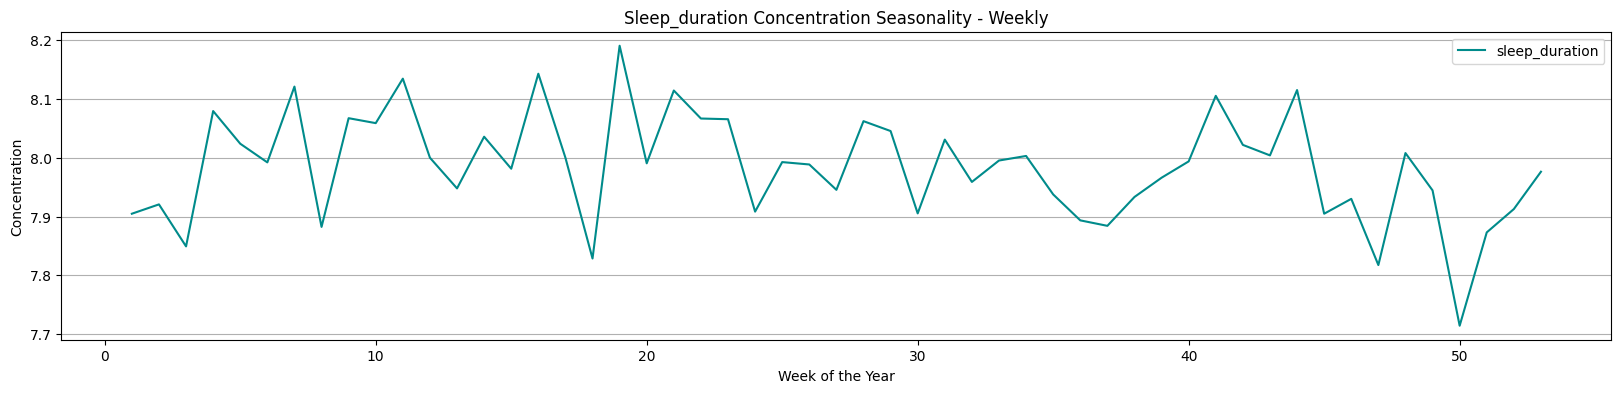

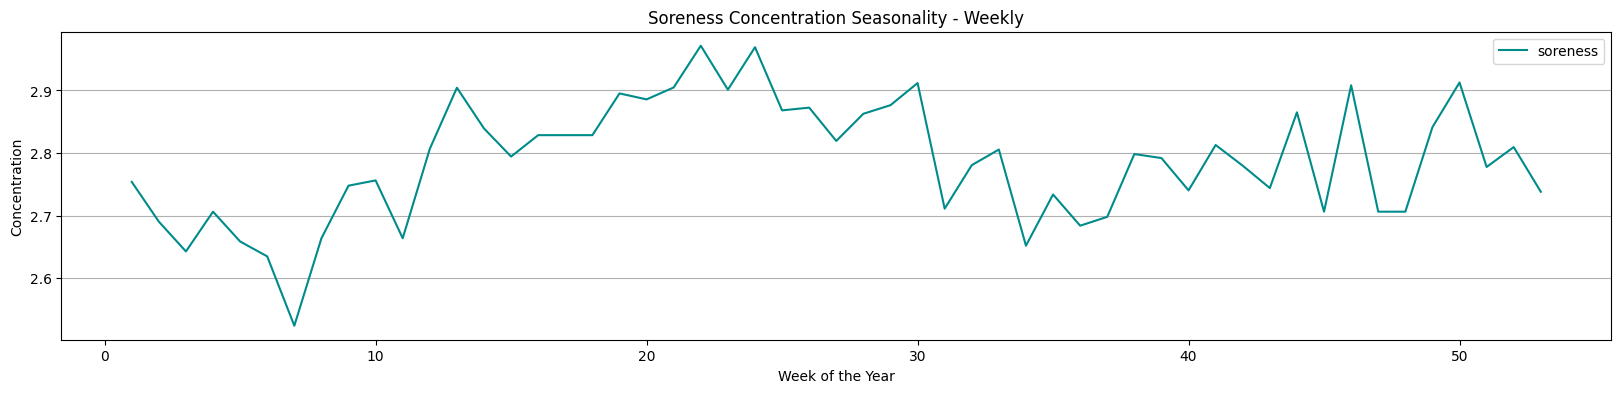

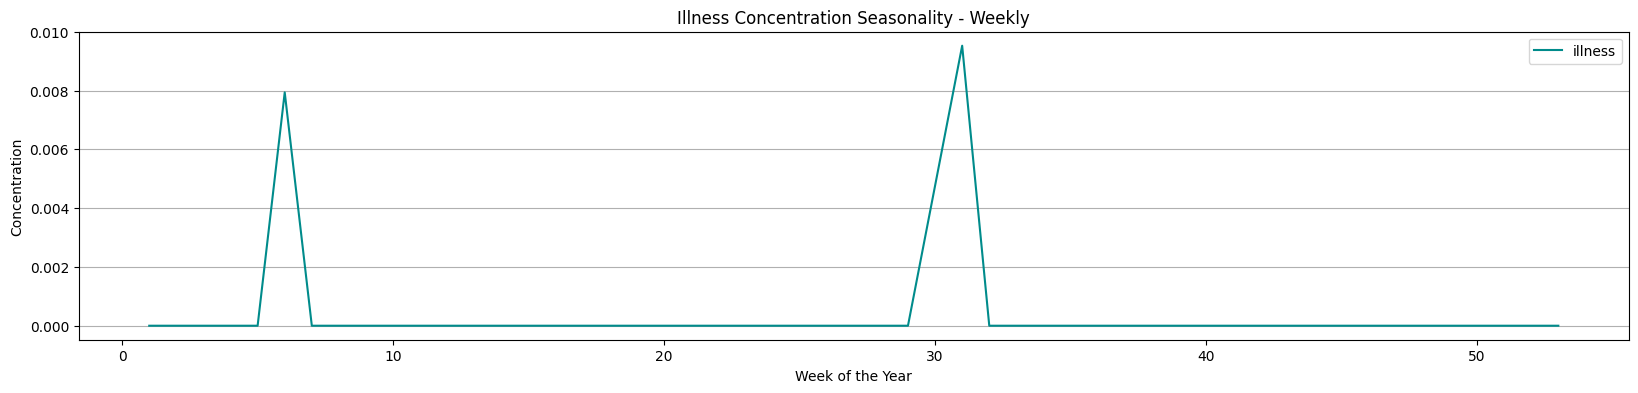

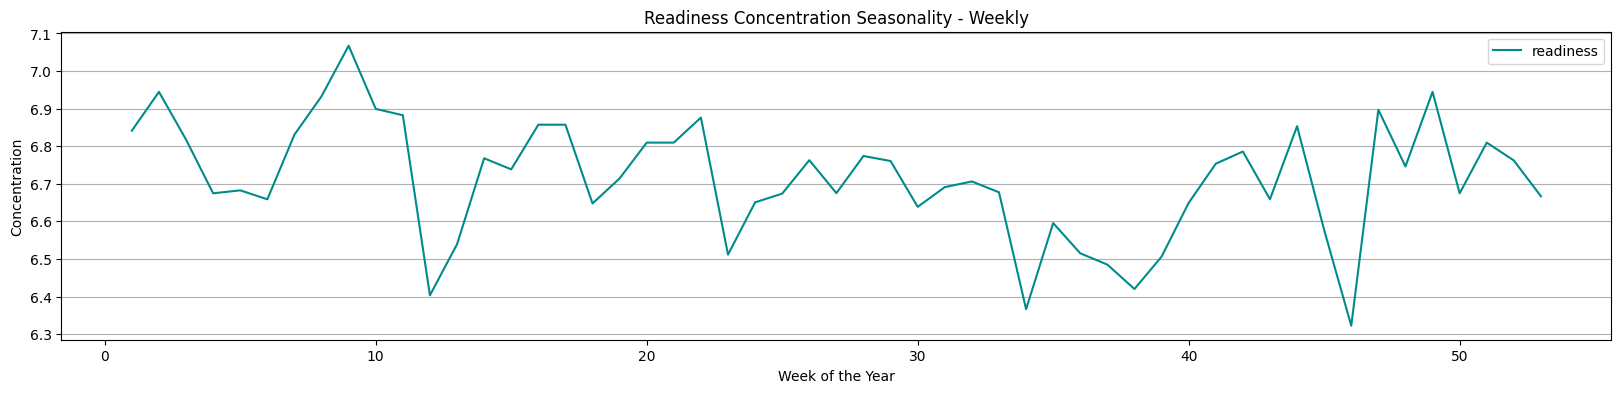

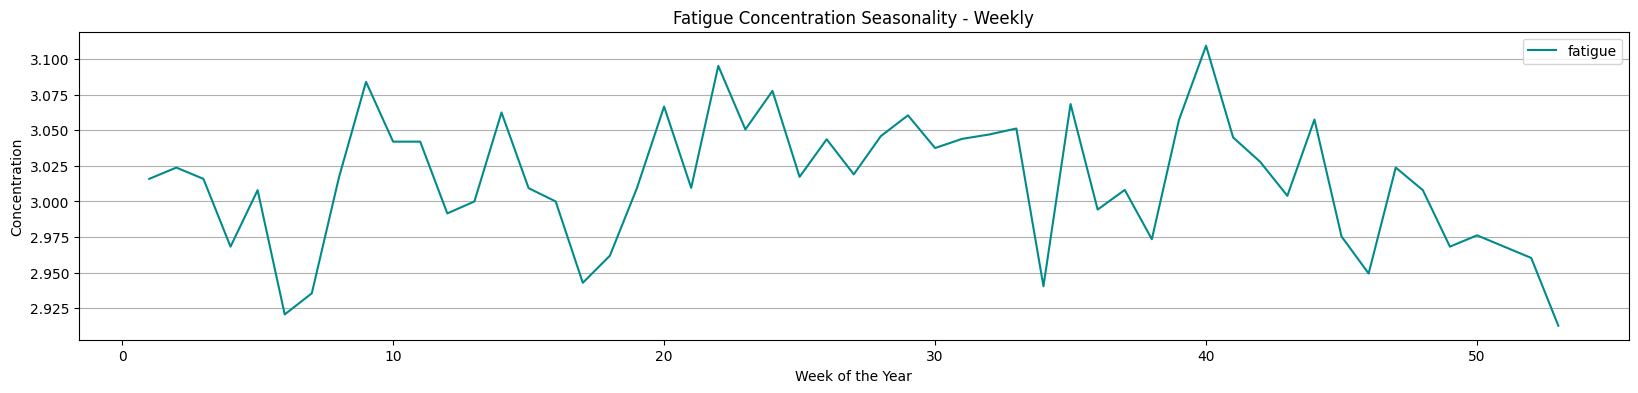

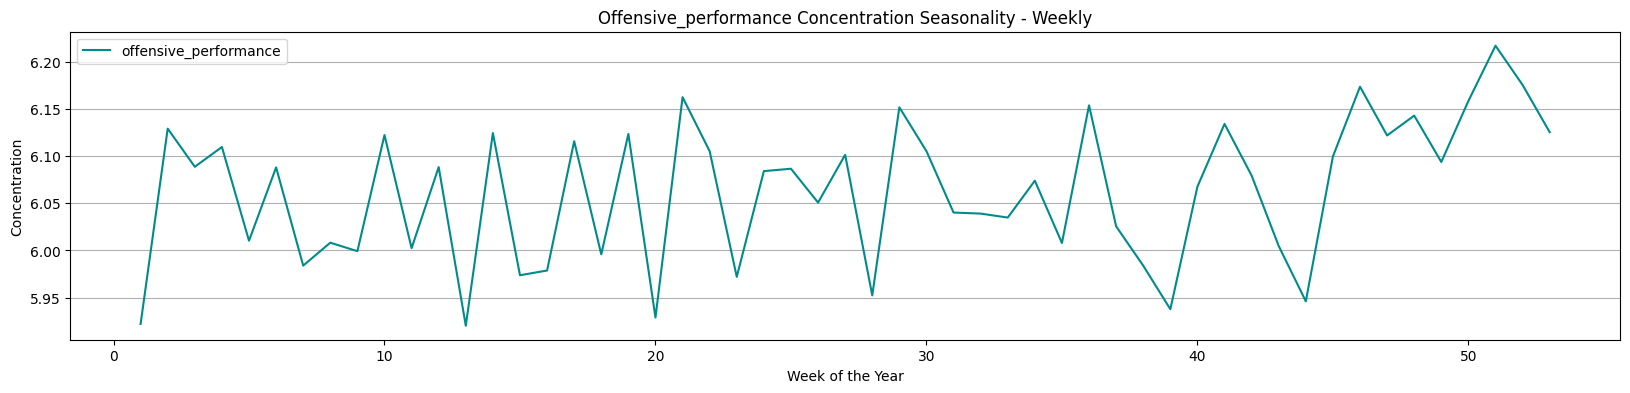

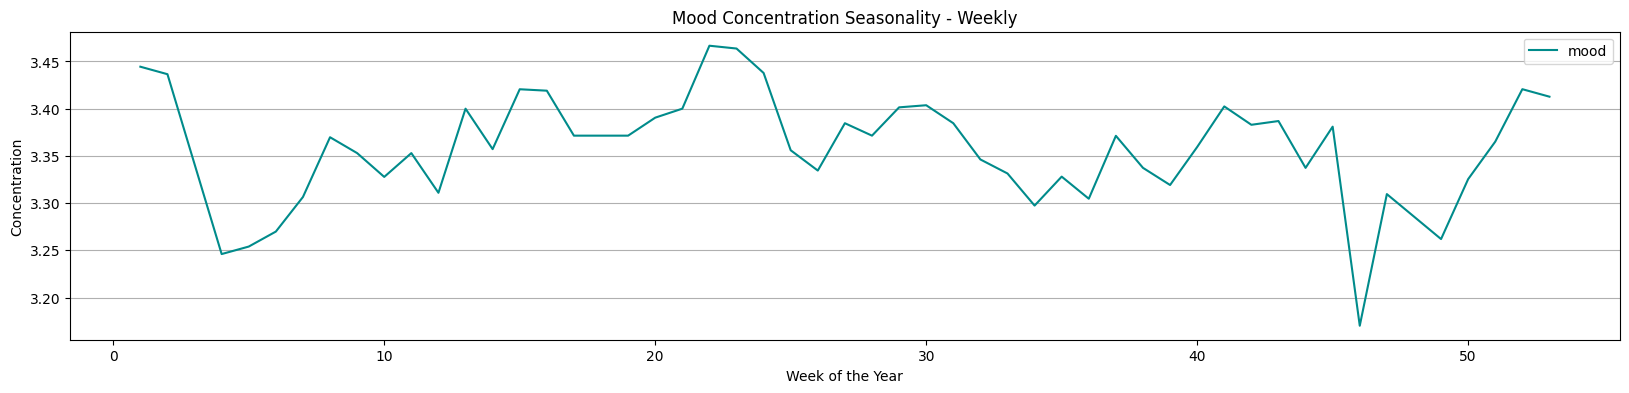

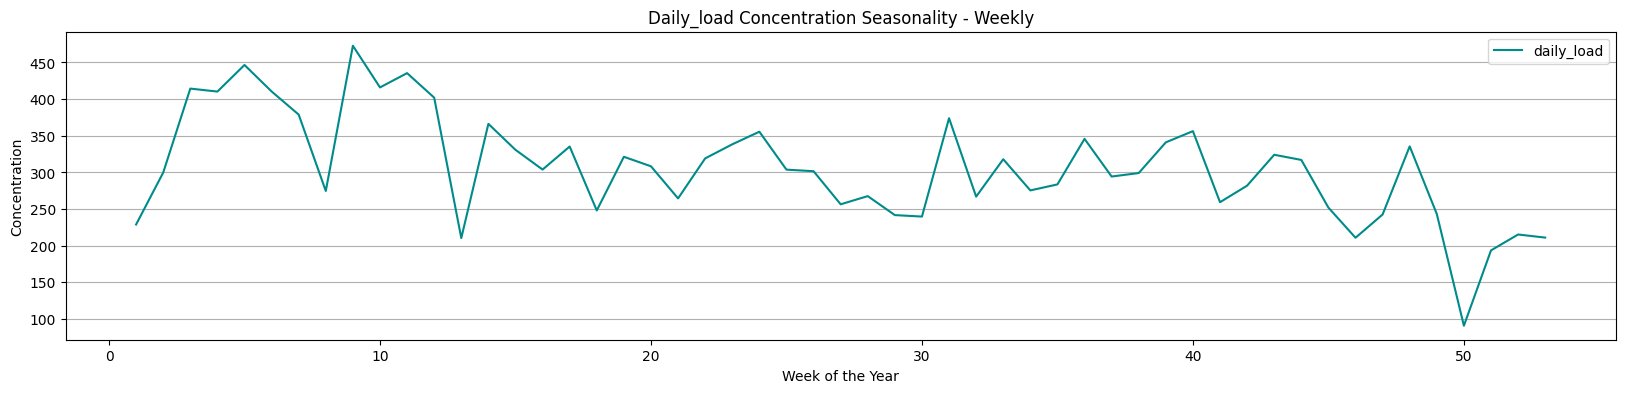

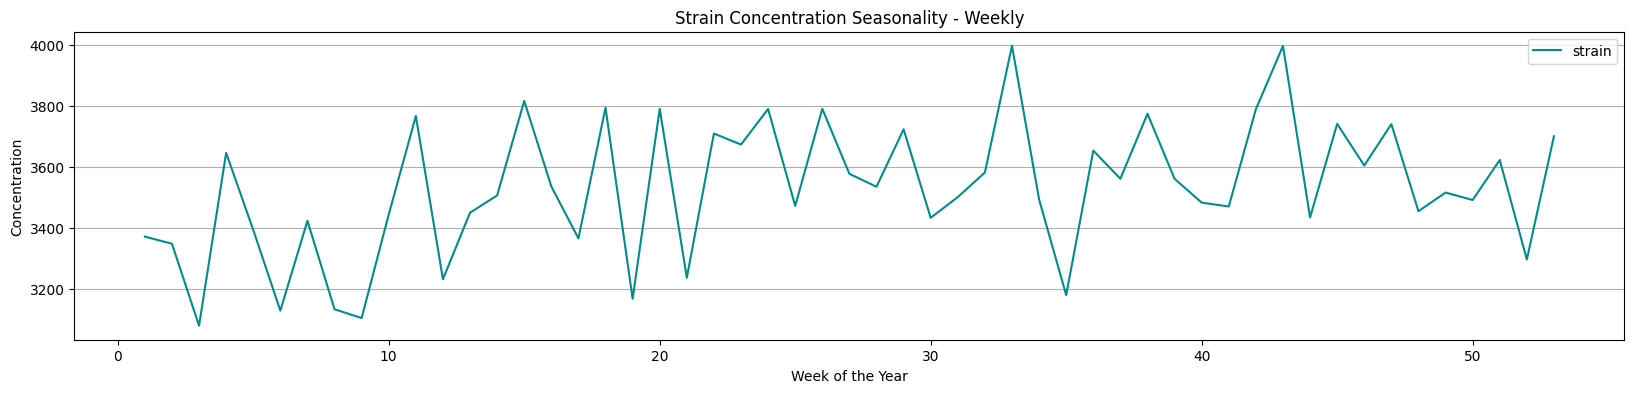

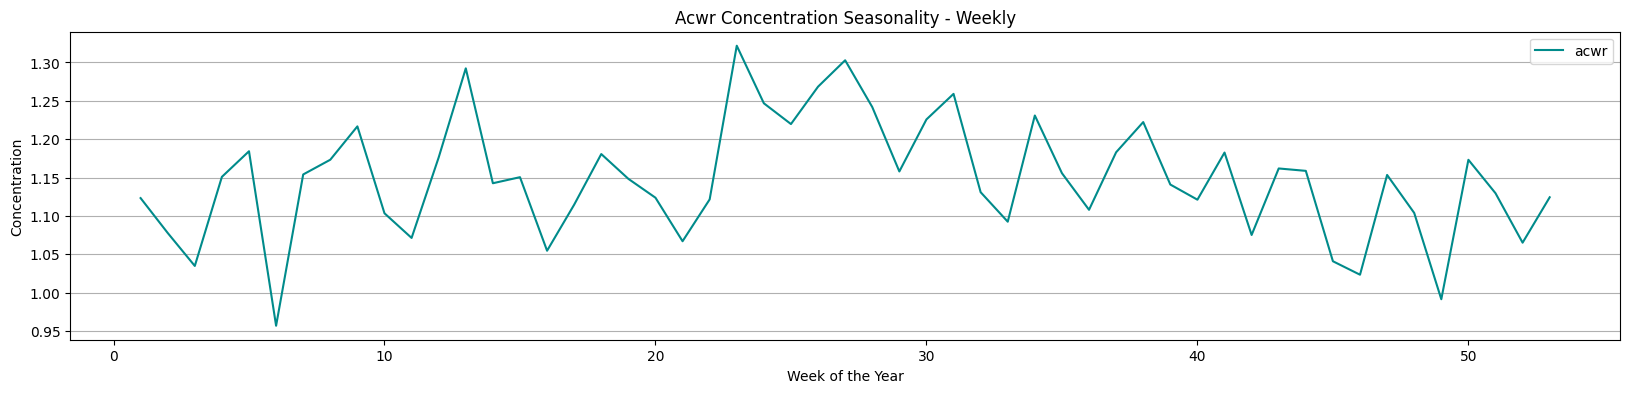

In [ ]:
# Plot the average concentration per week for each column
for var in important_columns:
    # Apply the groupby operation and plot the mean concentration for each variable
    fig, ax = plt.subplots(figsize=(20, 4))
    data_weekly[[var]].groupby(data_weekly.index.isocalendar().week).mean().plot(ax=ax, color= 'DarkCyan')  # Group by week and plot mean concentration
    ax.set_title(f"{var.capitalize()} Concentration Seasonality - Weekly")  # Set title
    ax.set_ylabel("Concentration")  # Y axis label
    ax.set_xlabel("Week of the Year")  # X axis label
    ax.grid(axis='y')  # Add grid lines to the y-axis
    plt.show()  # Show the plot


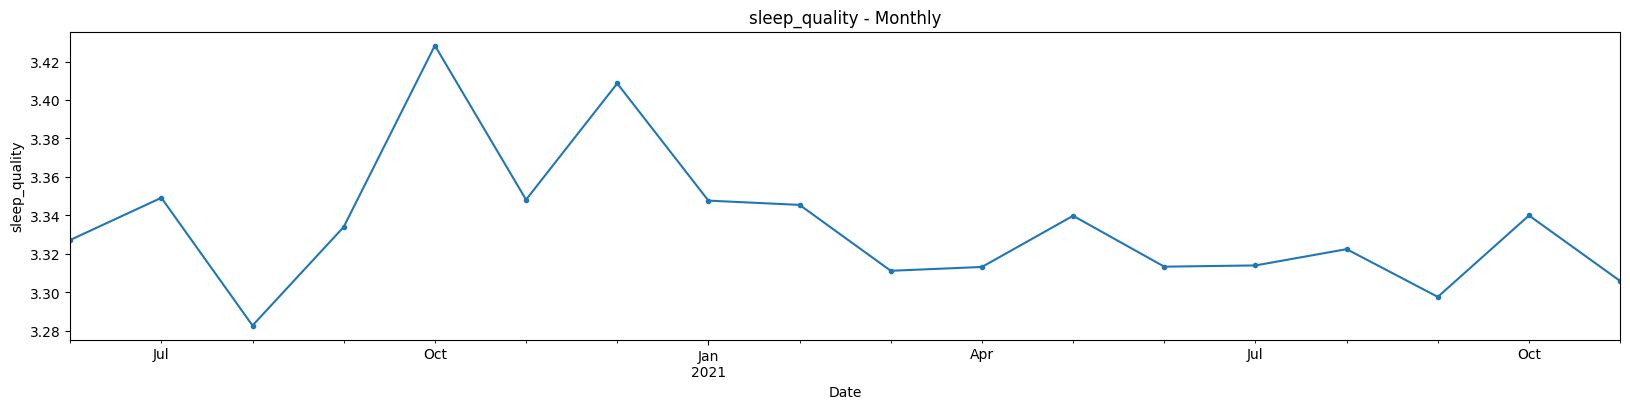

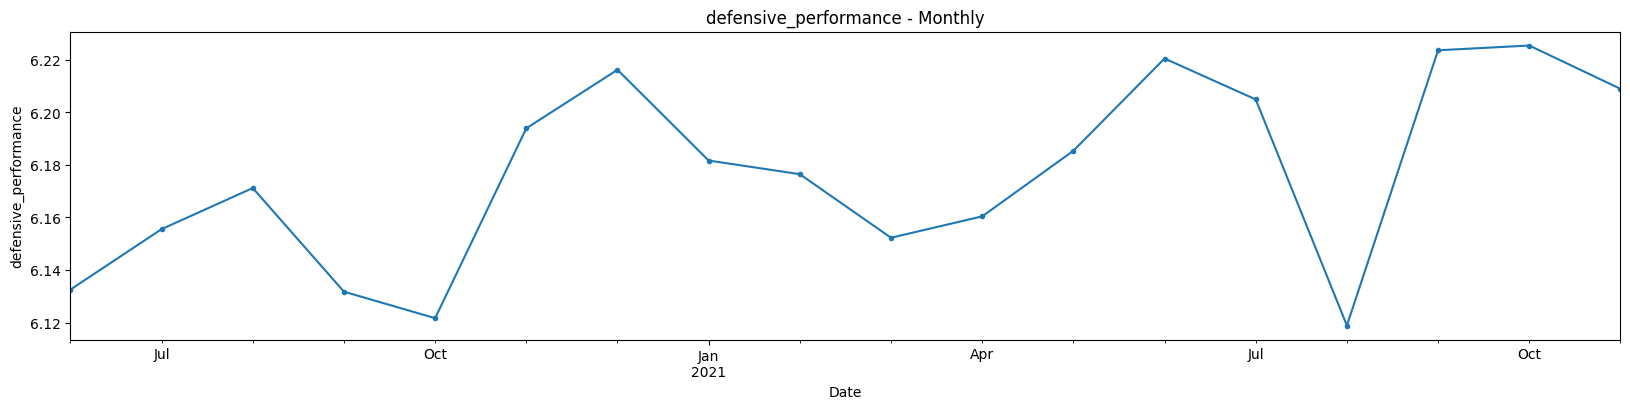

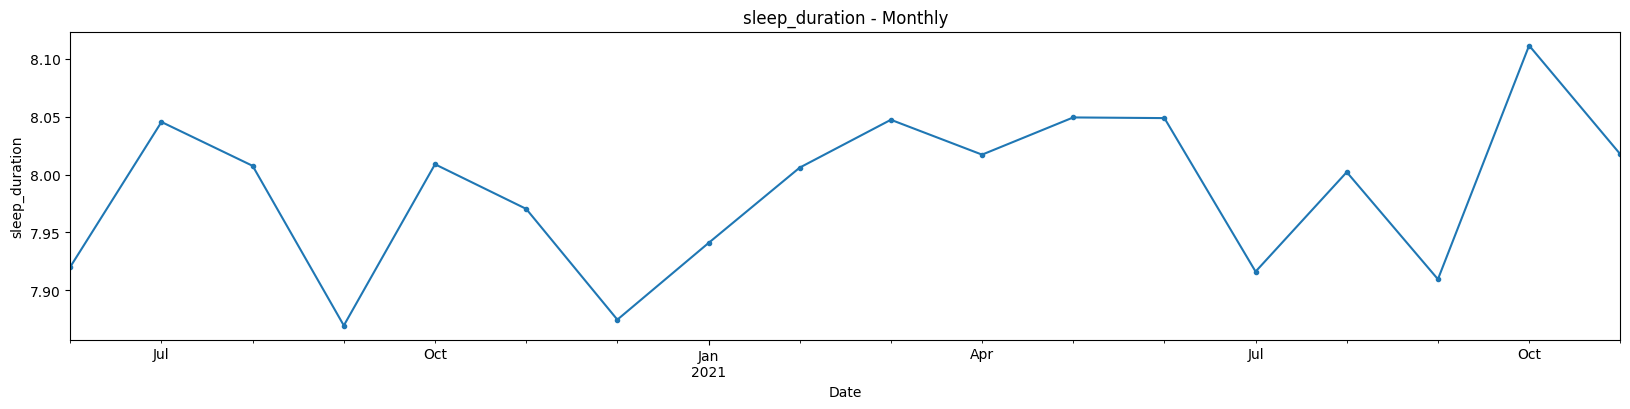

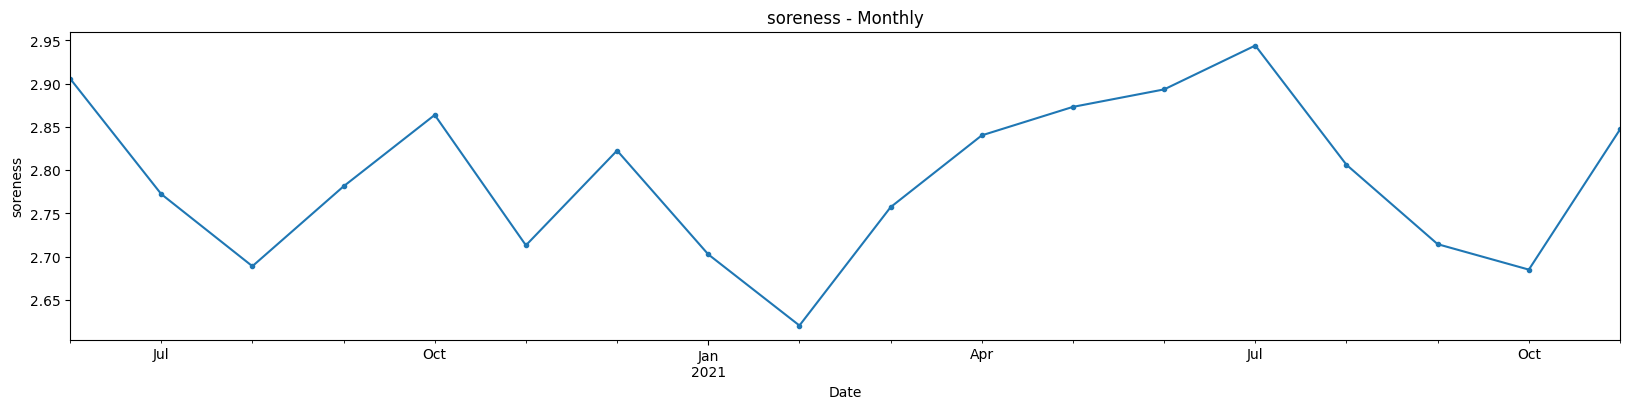

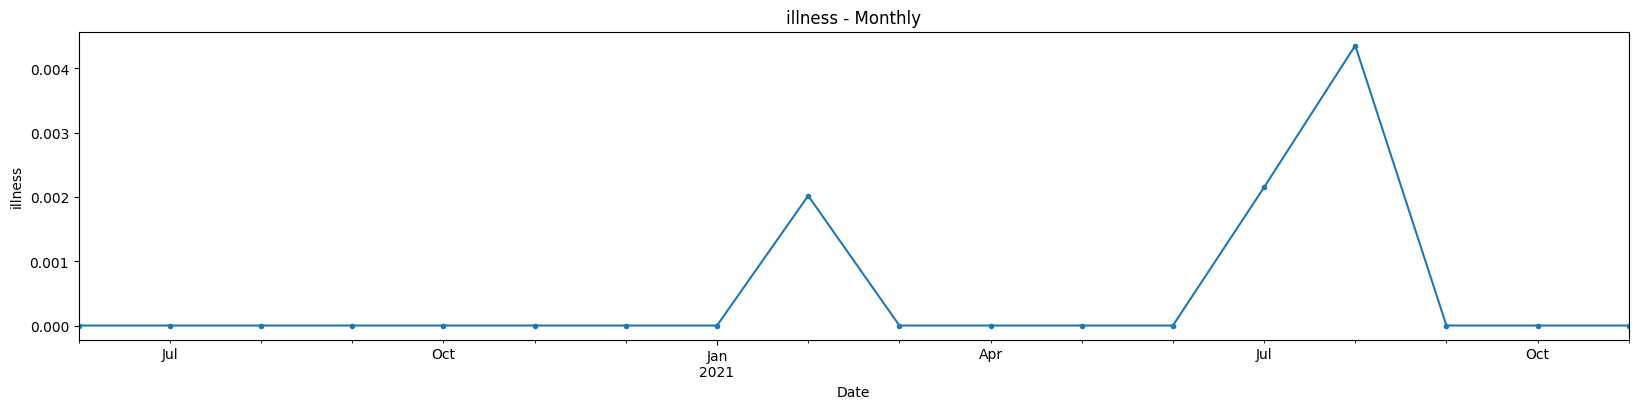

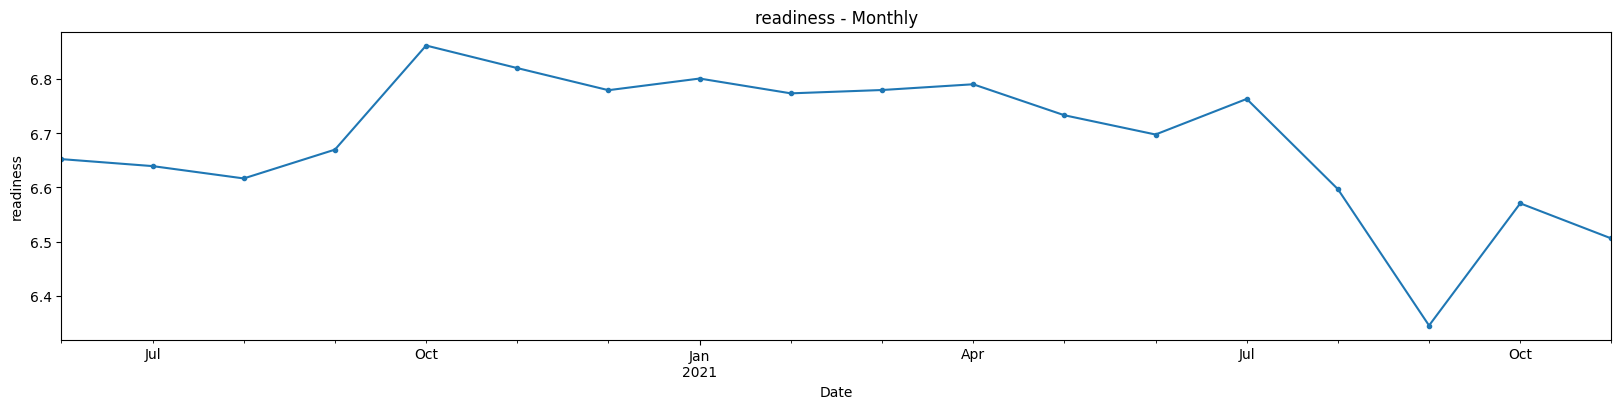

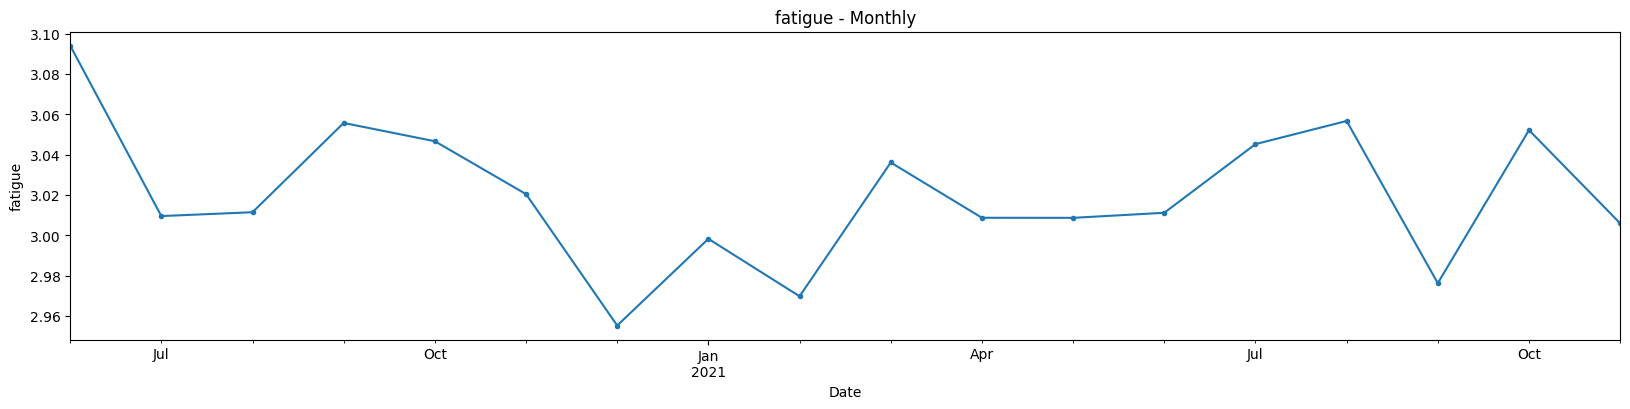

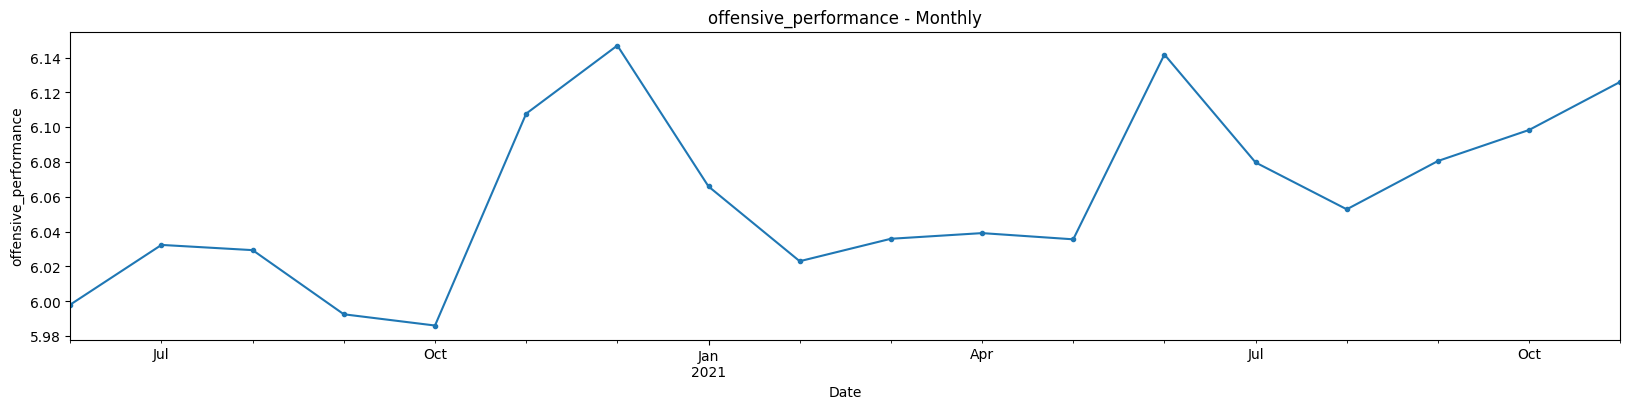

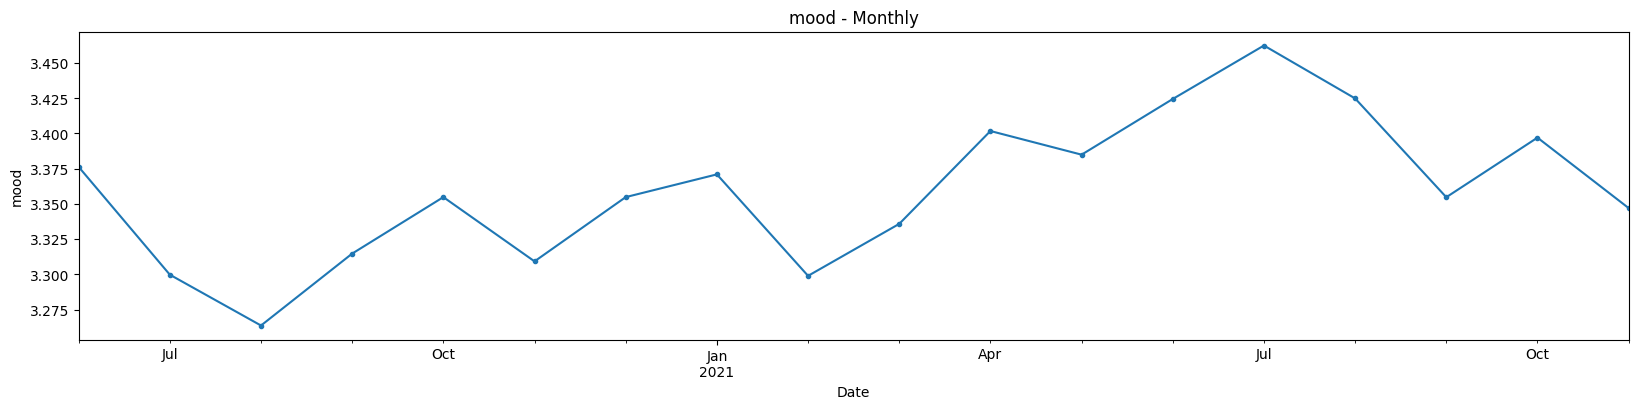

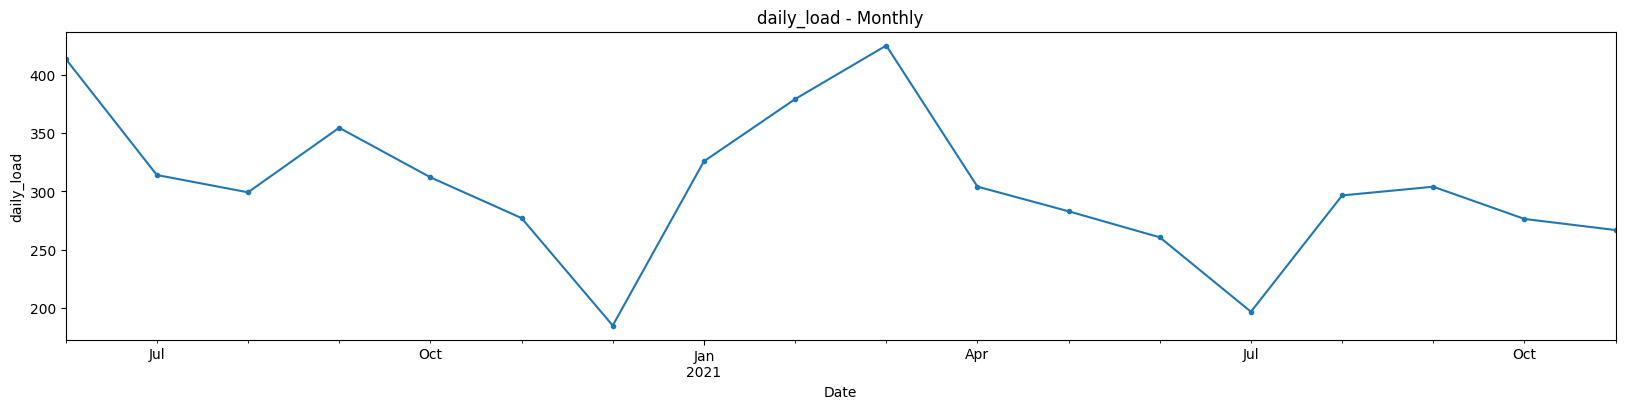

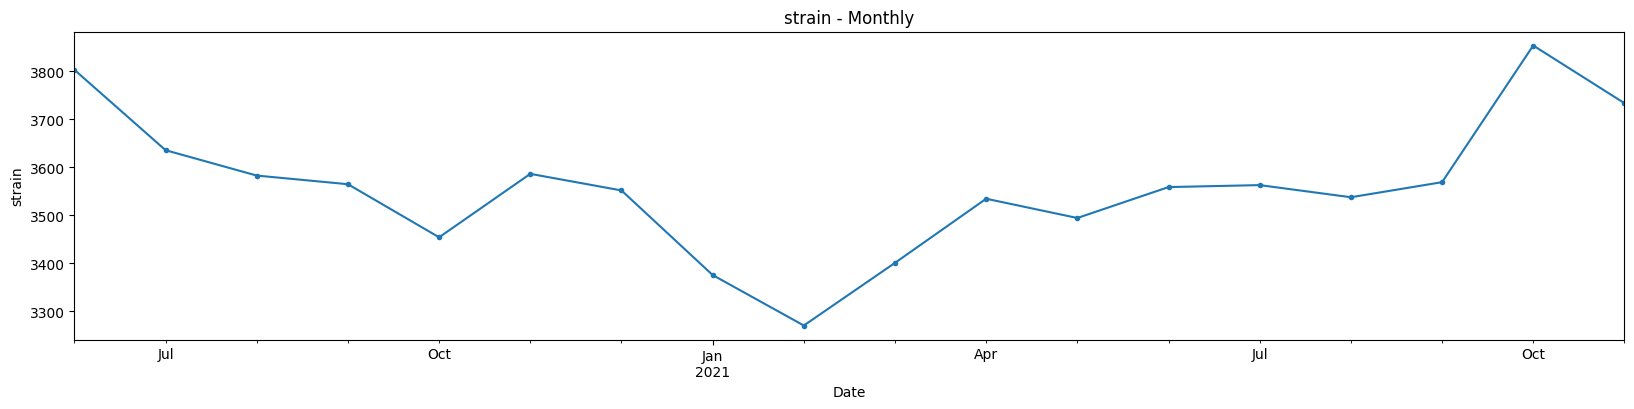

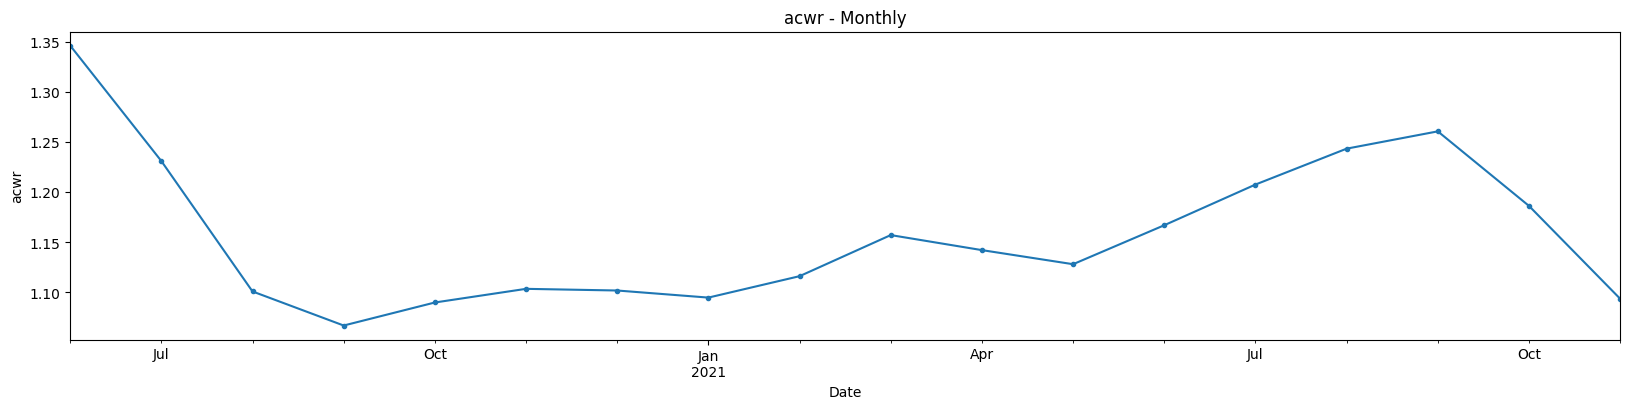

In [ ]:
# Plot the time series for important columns on a monthly basis
for var in important_columns:
    ax = data_monthly[var].plot(linestyle="-", marker=".", figsize=[20, 4])  # Plot the time series
    plt.title(f"{var} - Monthly")  # Add title
    plt.ylabel(var)  # Y axis label
    plt.show()

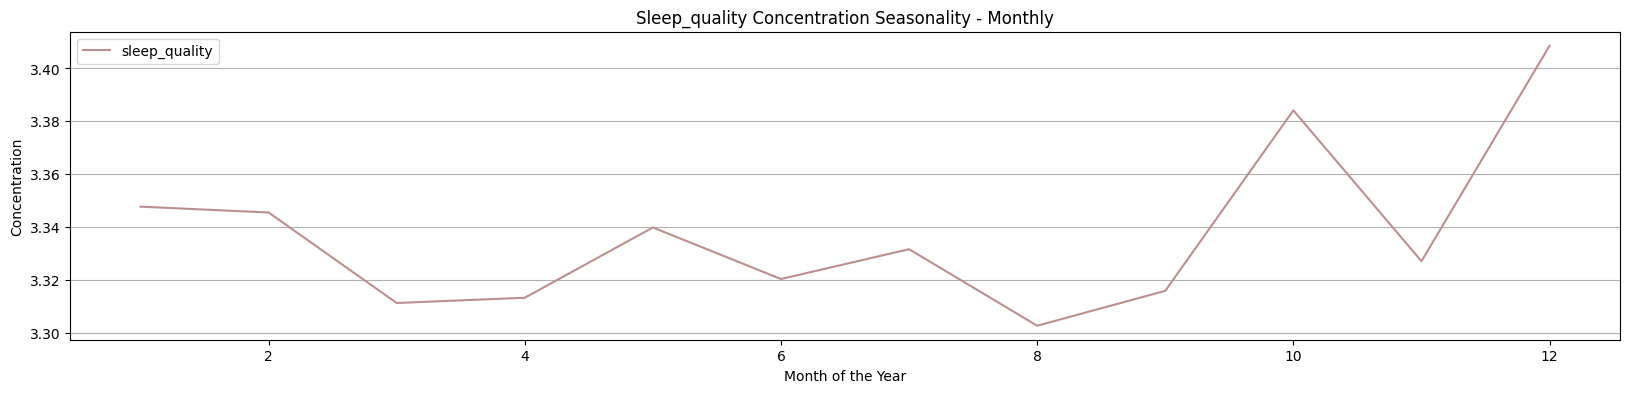

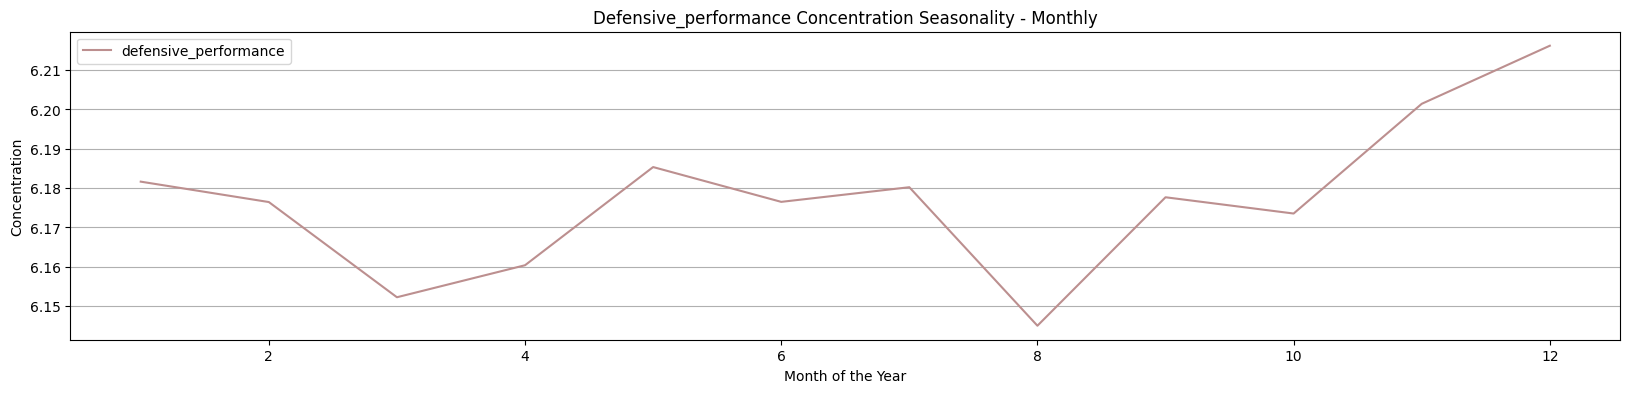

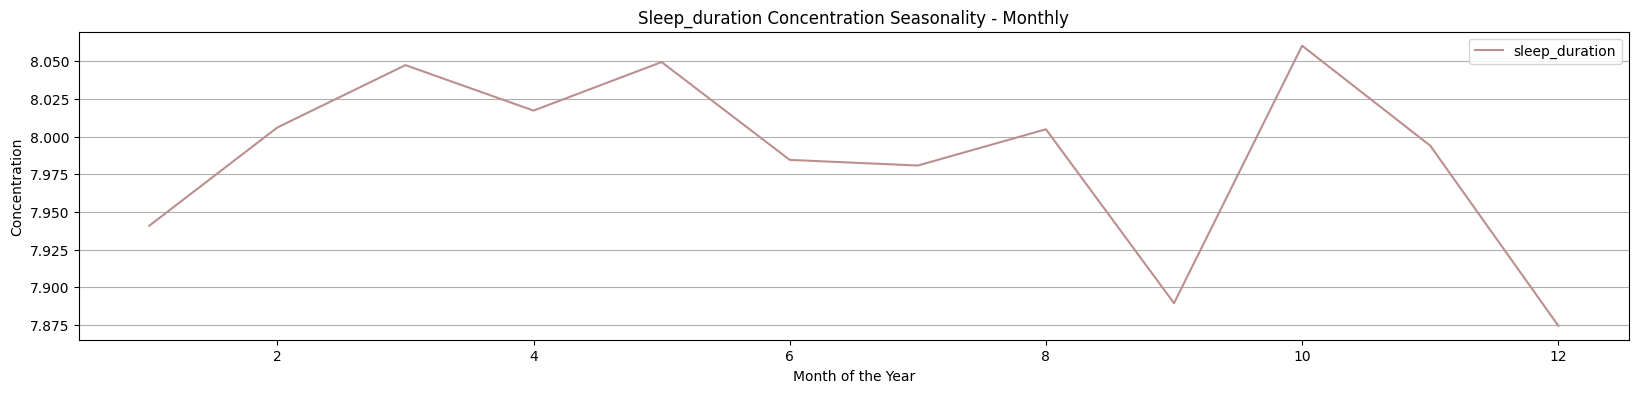

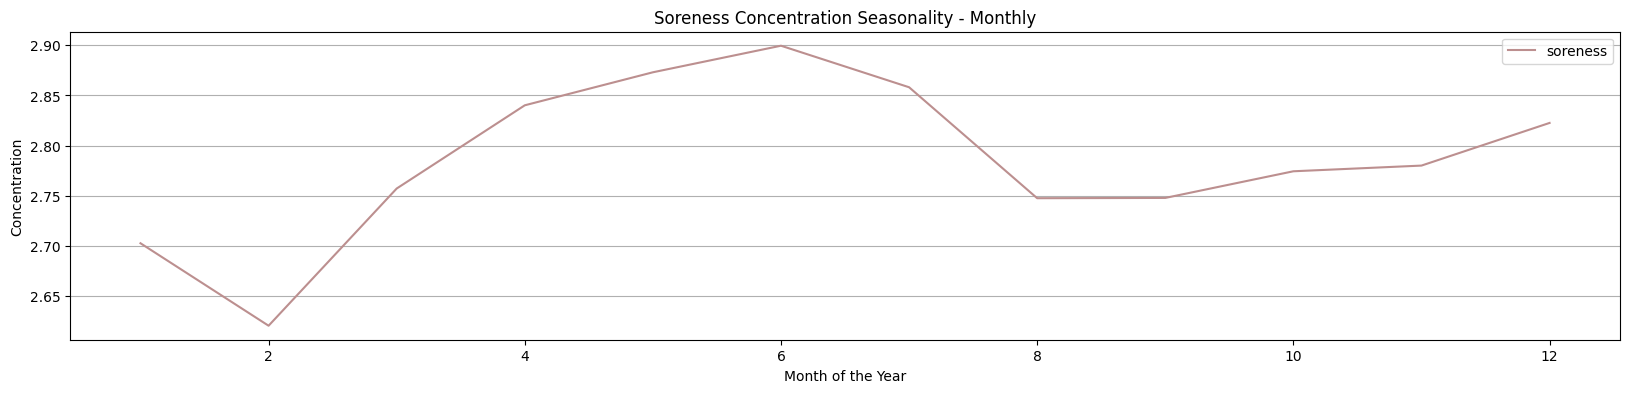

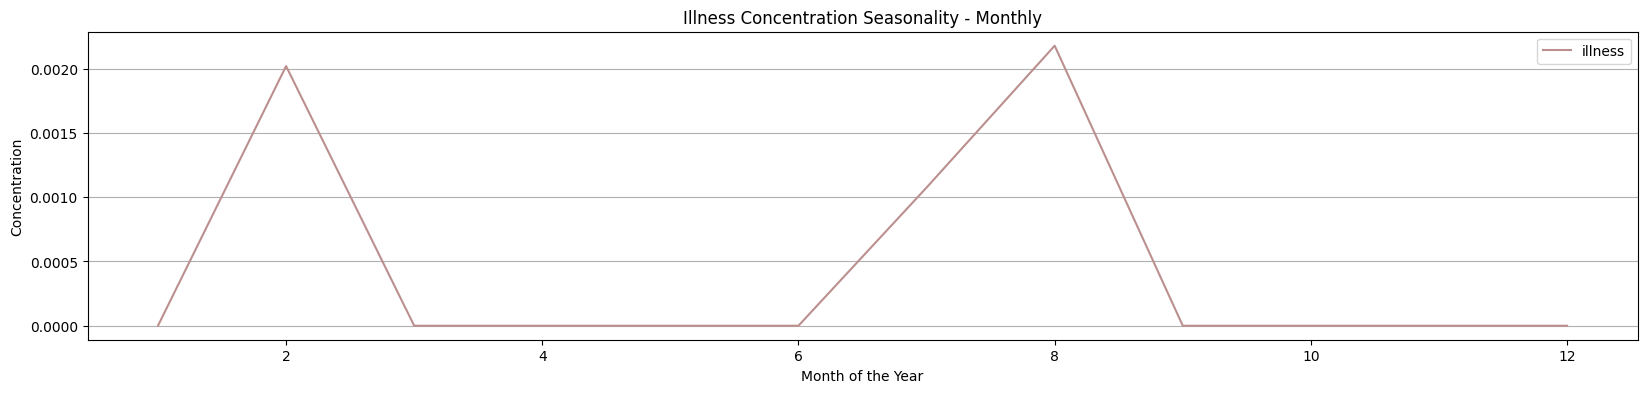

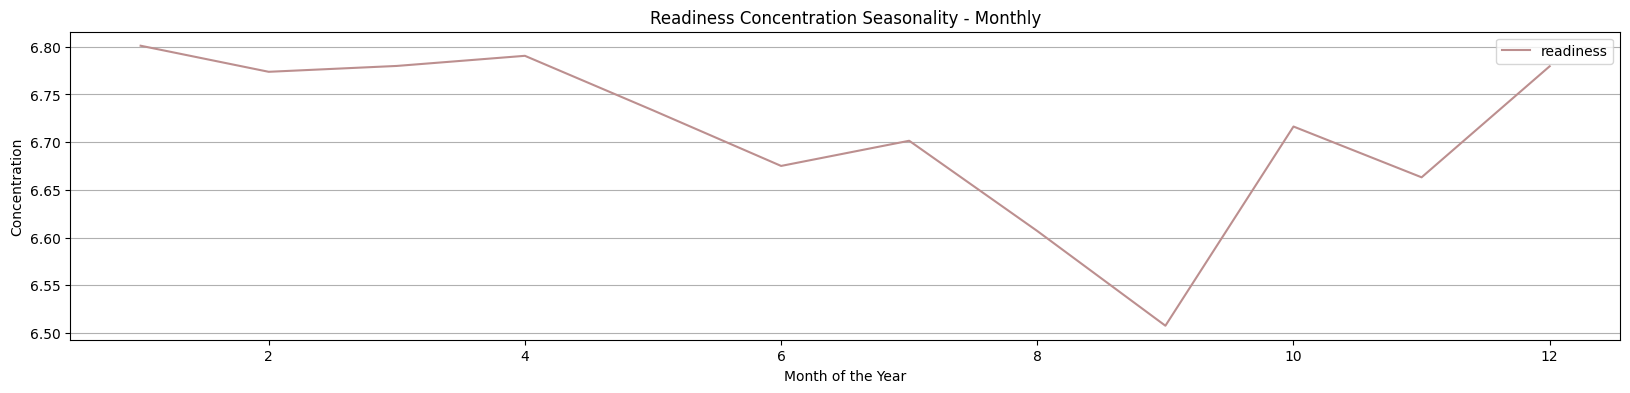

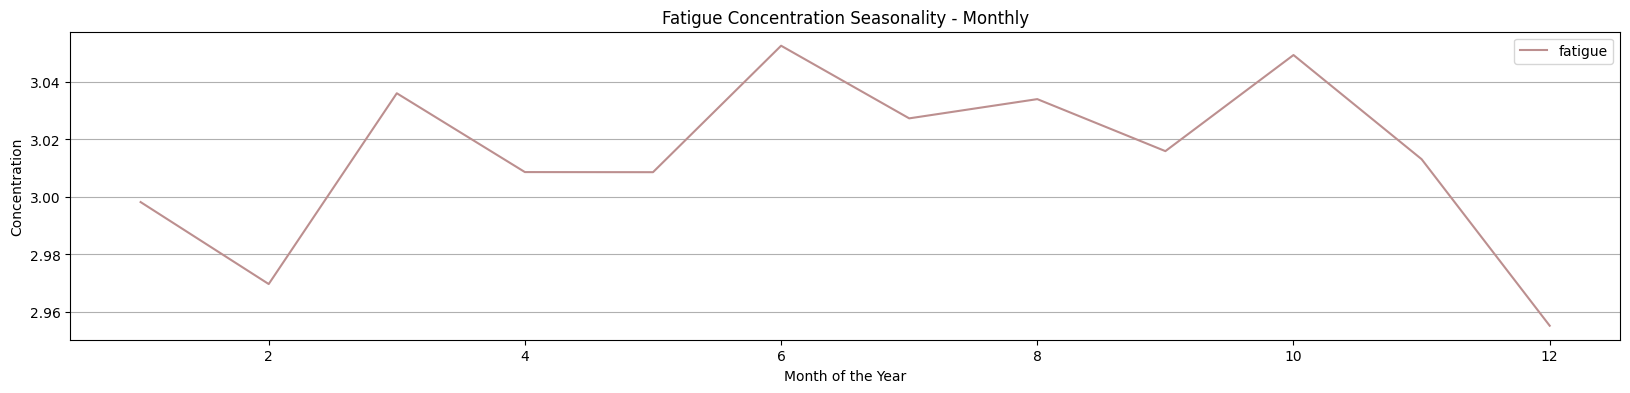

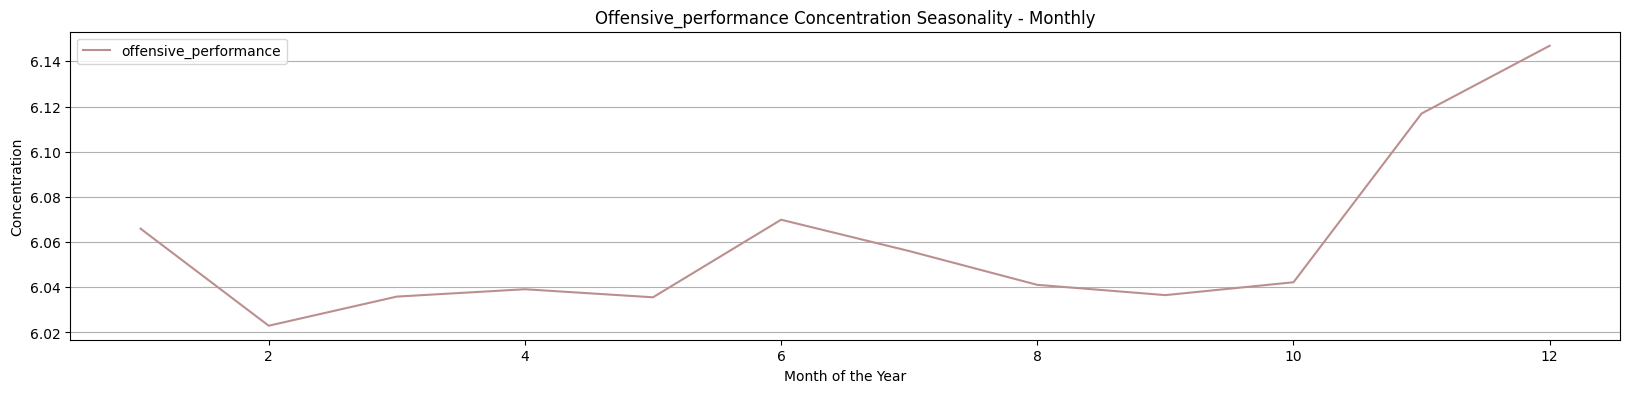

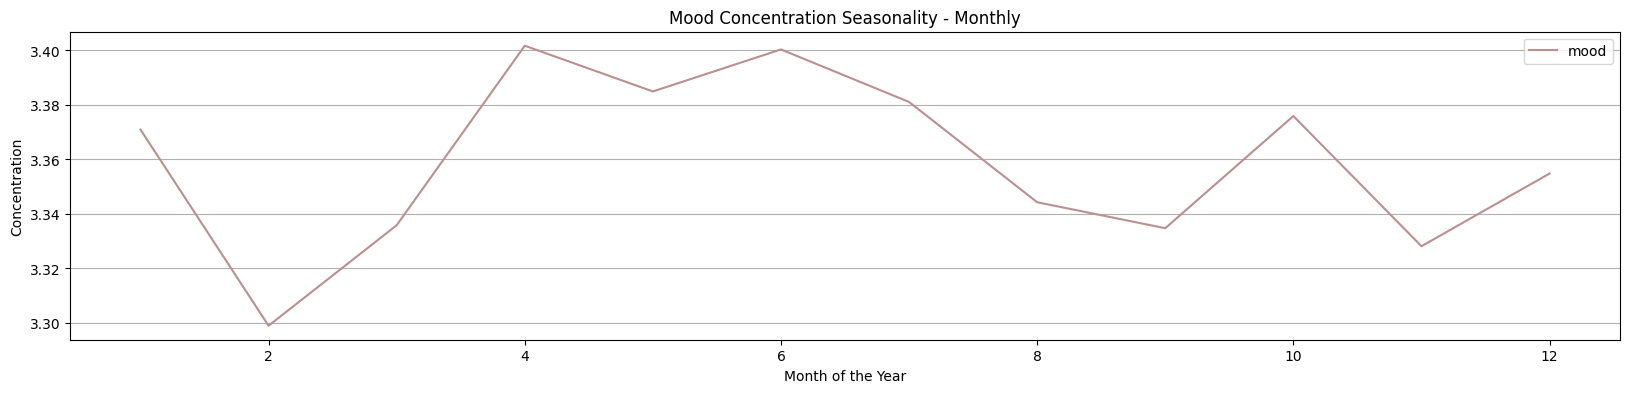

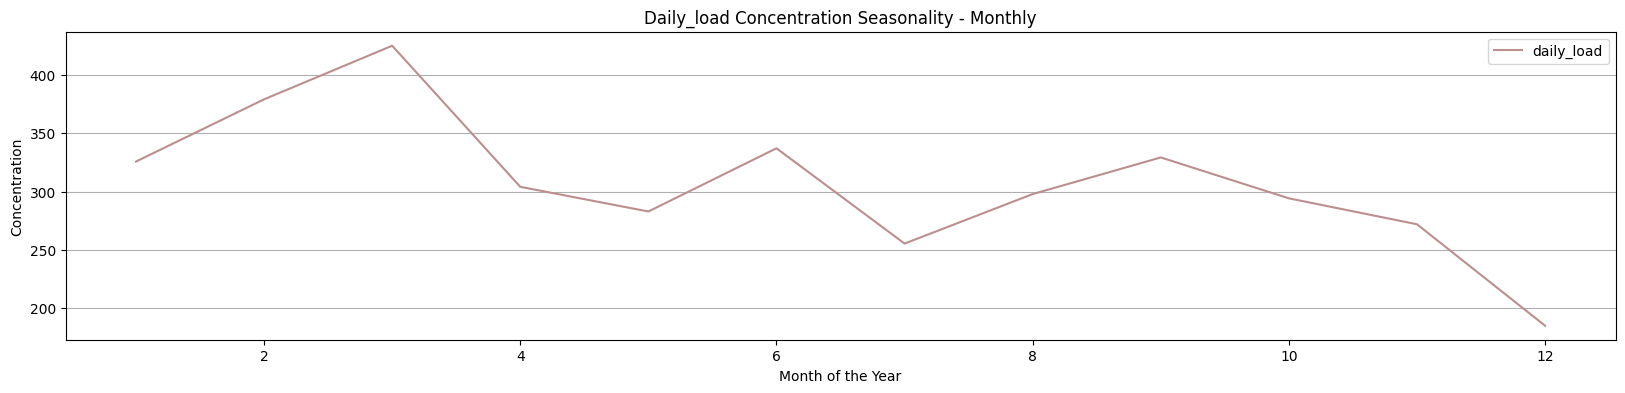

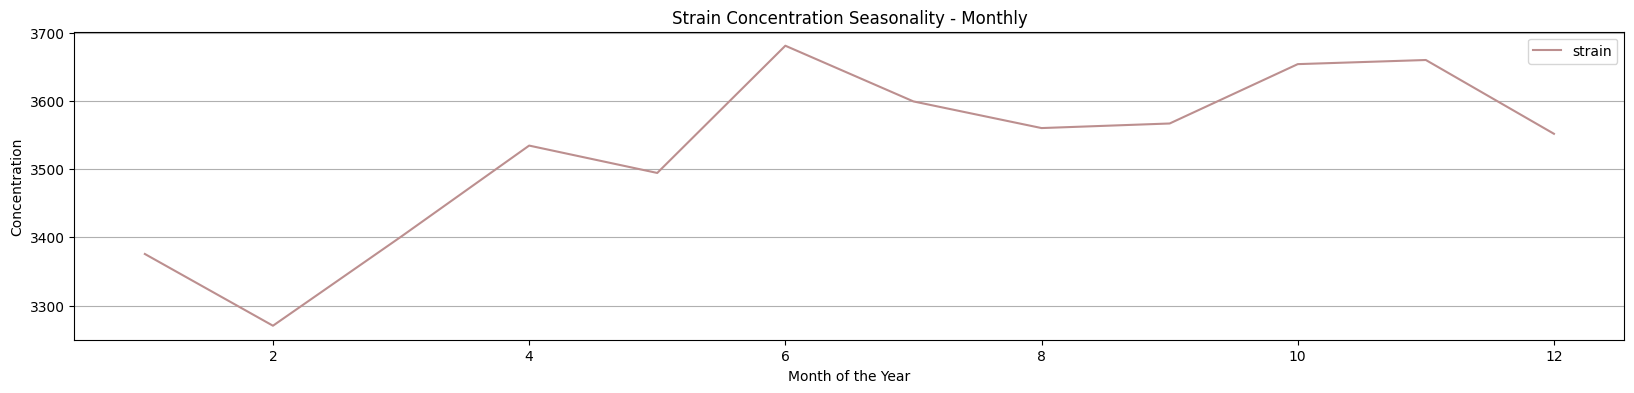

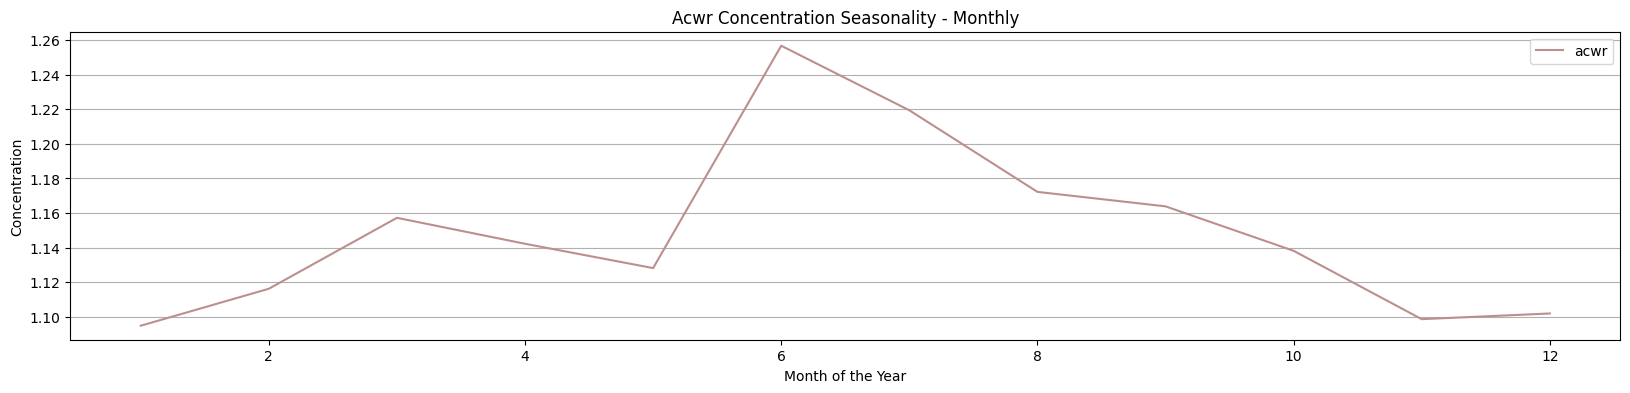

In [ ]:
# Plot the average concentration per month for each column
for var in important_columns:
    # Apply the groupby operation and plot the mean concentration for each variable
    fig, ax = plt.subplots(figsize=(20, 4))
    data_monthly[[var]].groupby(data_monthly.index.month).mean().plot(ax=ax, color='RosyBrown')  # Group by month and plot mean concentration
    ax.set_title(f"{var.capitalize()} Concentration Seasonality - Monthly")  # Set title
    ax.set_ylabel("Concentration")  # Y axis label
    ax.set_xlabel("Month of the Year")  # X axis label
    ax.grid(axis='y')  # Add grid lines to the y-axis
    plt.show()  # Show the plot

The analysis of monthly seasonality across various performance and well-being metrics reveals distinct patterns in concentration levels throughout the year. Across different parameters such as sleep quality, defensive performance, sleep duration, soreness, illness, readiness, fatigue, offensive performance, mood, daily load, strain, and ACWR, cyclic trends emerge, indicating recurring fluctuations in concentration levels. These patterns typically involve peaks and troughs at specific months, suggesting a seasonal influence on individual metrics. For instance, variables like readiness, fatigue, offensive performance, mood, daily load, strain, and ACWR exhibit peaks in concentration around mid-year, followed by rapid declines post-October, indicating potential seasonal fluctuations in performance and workload. Conversely, metrics such as sleep quality and illness demonstrate different seasonal patterns, with concentrations varying across months, potentially influenced by external factors such as weather, training schedules, or competition calendars. Understanding these seasonal trends can provide valuable insights for optimizing performance, managing workload, and planning interventions effectively throughout the year.

In [ ]:
print(df.columns)

Index(['daily_load', 'fatigue', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'stress', 'injury_ts', 'weekly_load',
       'Total_distance', 'Average_running_speed', 'Top_speed', 'HIR', 'injury',
       'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness'],
      dtype='object')


##### Autocorrelation

In [ ]:
# Plotting autocorrelation for each important column

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create lag plots
def create_lag_plots(data, lags=6):
    fig, axs = plt.subplots(nrows=len(data.columns), ncols=lags, figsize=(40, 60))
    for i, col in enumerate(data.columns):
        for j in range(1, lags+1):
            axs[i][j-1].scatter(data.shift(j)[col], data[col], alpha=0.5)
            axs[i][j-1].set_xlabel(f"{col} (lagged {j})")
            axs[i][j-1].set_ylabel(col)
            axs[i][j-1].set_title(f"Time Lagged Plot of {col} (Lag {j})")
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
    plt.tight_layout()
    plt.show()

# Step 1: Create lag plots
create_lag_plots(df[important_columns], lags=6)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Function to create advanced lag plots with regression lines
def create_lag_plots_adv(data, lags=5):
    sns.set_style("whitegrid")
    plt.figure(figsize=(44, 60))
    for i, col in enumerate(data.columns):
        for j in range(1, lags+1):
            plt.subplot(len(data.columns), lags, i*lags+j)
            fig = sns.regplot(x=data.shift(j)[col], y=data[col], scatter_kws={"s": 10}, line_kws={"color": "red"},)
            plt.xlabel(f"{col} (lagged {j})", fontsize=20, fontweight="bold")
            plt.ylabel(col, fontsize=10, fontweight="bold")
            plt.title(f"Lag Plot of {col} (Lag {j})", fontsize=22, fontweight="bold")
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            plt.tight_layout()
    plt.show()

# Create advanced lag plots with regression lines
create_lag_plots_adv(df[important_columns], lags=5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(df.columns)

Index(['daily_load', 'fatigue', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'stress', 'injury_ts', 'weekly_load',
       'Total_distance', 'Average_running_speed', 'Top_speed', 'HIR', 'injury',
       'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness'],
      dtype='object')


##### Partial Autocorrelation

<Figure size 1000x600 with 0 Axes>

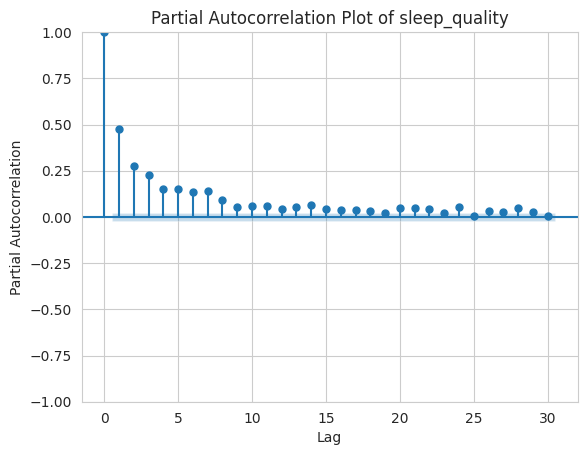

<Figure size 1000x600 with 0 Axes>

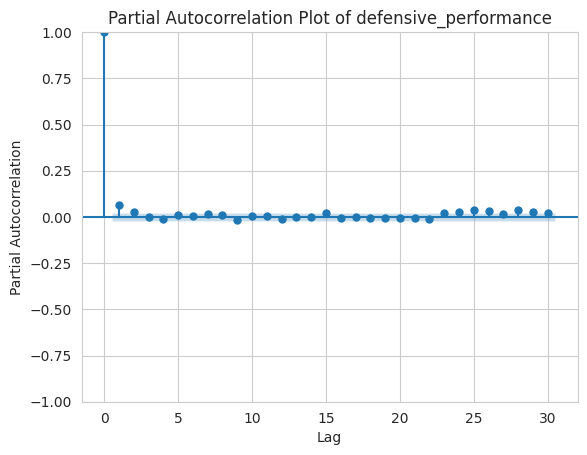

<Figure size 1000x600 with 0 Axes>

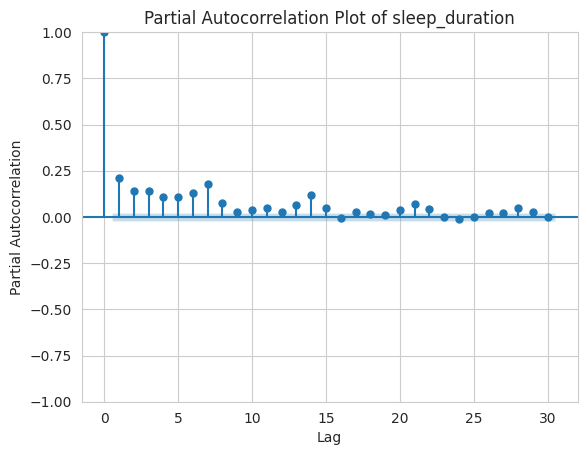

<Figure size 1000x600 with 0 Axes>

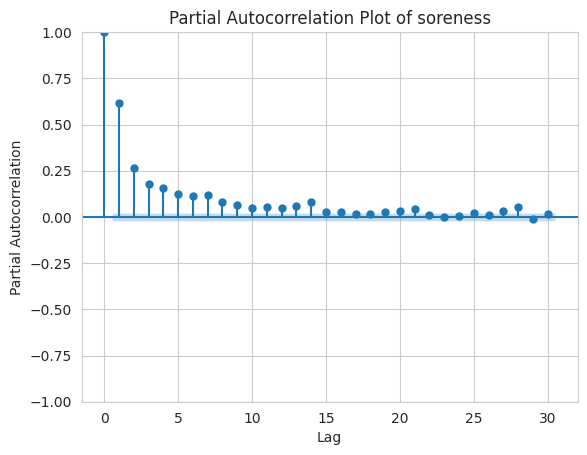

<Figure size 1000x600 with 0 Axes>

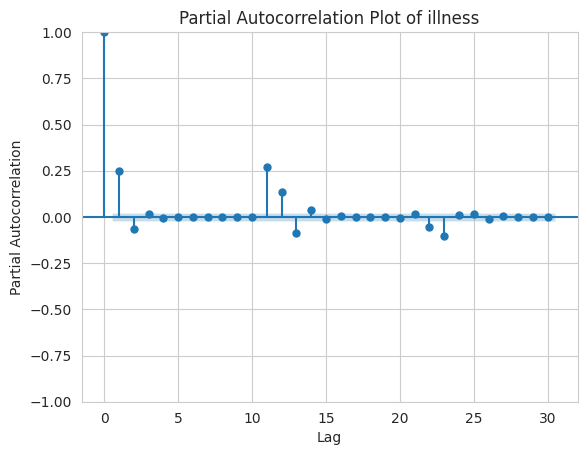

<Figure size 1000x600 with 0 Axes>

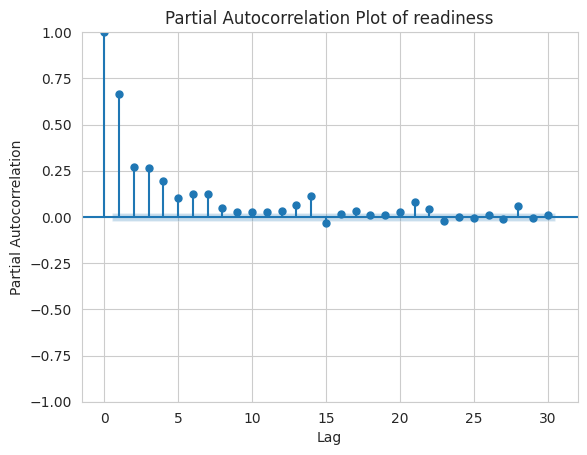

<Figure size 1000x600 with 0 Axes>

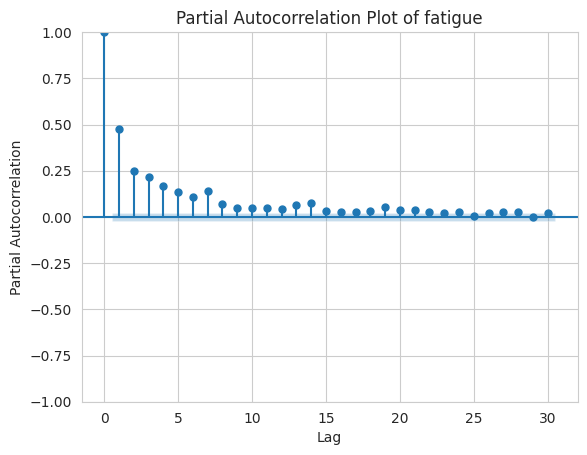

<Figure size 1000x600 with 0 Axes>

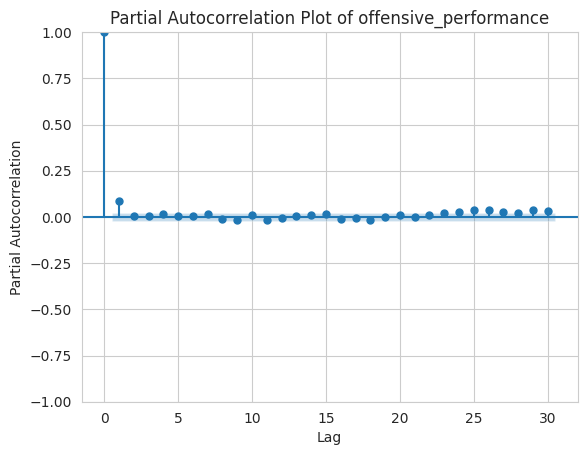

<Figure size 1000x600 with 0 Axes>

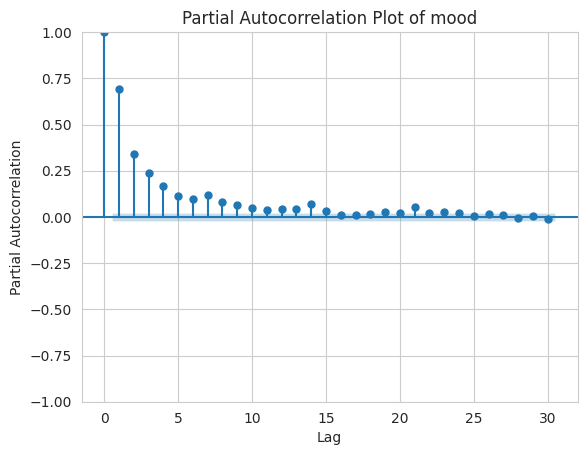

<Figure size 1000x600 with 0 Axes>

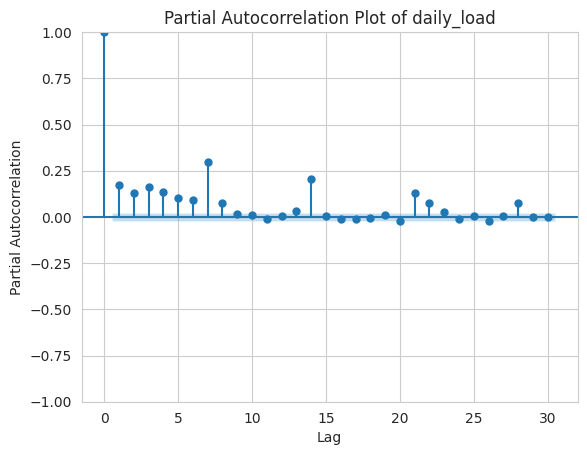

<Figure size 1000x600 with 0 Axes>

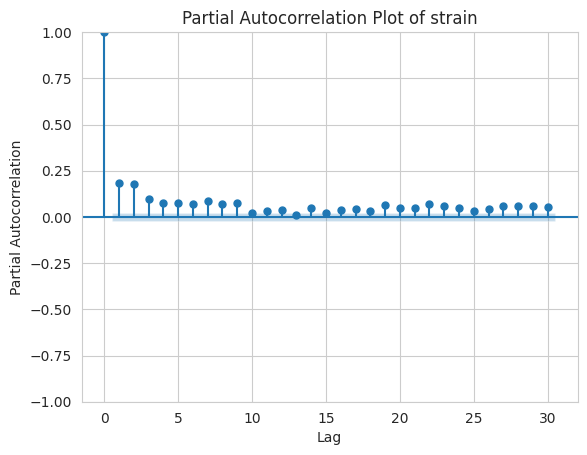

<Figure size 1000x600 with 0 Axes>

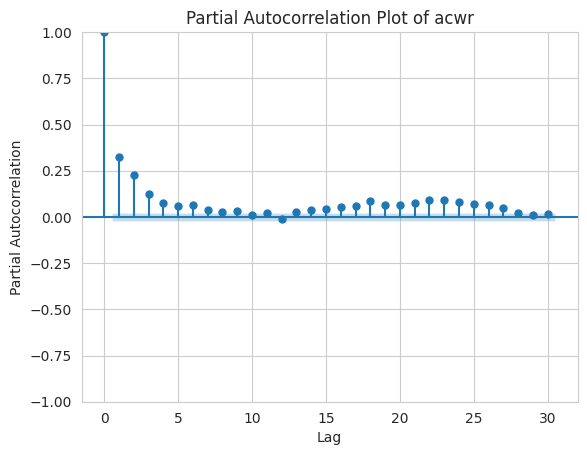

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plotting partial autocorrelation for each column
for column in important_columns:
    plt.figure(figsize=(10, 6))
    plot_pacf(df[column], lags=30)  # Adjust the number of lags as needed
    plt.title(f'Partial Autocorrelation Plot of {column}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

In [ ]:
# Reset the index to bring the 'Date' column back
df.reset_index(inplace=True)

print(df.columns)

Index(['Date', 'daily_load', 'fatigue', 'mood', 'readiness', 'sleep_duration',
       'sleep_quality', 'soreness', 'stress', 'injury_ts', 'weekly_load',
       'Total_distance', 'Average_running_speed', 'Top_speed', 'HIR', 'injury',
       'acwr', 'atl', 'ctl28', 'ctl42', 'monotony', 'strain',
       'team_performance', 'offensive_performance', 'defensive_performance',
       'illness'],
      dtype='object')
